In [ ]:
### Look at Auth x Variable mediation

In [248]:
# %%time
## Just an easy way to load utility functions
dataset_name = "W19_comb"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}


Toggle code

In [34]:
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_valuesW19"+".csv")
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')

In [52]:
pan_dataset_allr_values.index = BES_Panel.index

In [30]:
search(BES_Panel,"gayMarriage|sexuality")

gayMarriageW10    30237
xsexualityW10     30237
p_sexualityW1     23411
p_sexualityW2     29093
p_sexualityW3     27227
p_sexualityW4     29398
p_sexualityW5     29432
p_sexualityW6     29037
p_sexualityW7     29871
p_sexualityW8     33002
p_sexualityW9     29802
p_sexualityW10    30236
p_sexualityW11    30640
p_sexualityW12    34075
p_sexualityW13    31061
p_sexualityW14    30943
p_sexualityW15    30618
p_sexualityW16    37538
p_sexualityW17    34055
p_sexualityW18    37758
p_sexualityW19    32149
dtype: int64

In [32]:
BES_Panel["p_sexualityW10"].value_counts(dropna=False)

NaN                  66770
Heterosexual         26805
Prefer not to say     1139
Gay or lesbian        1105
Bisexual               912
Other                  275
Name: p_sexualityW10, dtype: int64

In [33]:
BES_Panel["gayMarriageW10"].value_counts(dropna=False)

NaN                           66769
Strongly agree                10927
Agree                          8710
Neither agree nor disagree     4764
Disagree                       2498
Strongly disagree              2318
Don't know                     1020
Name: gayMarriageW10, dtype: int64

In [57]:
BES_Panel["gayMarriageW10"]

id
1        Neither agree nor disagree
2        Neither agree nor disagree
3        Neither agree nor disagree
4                               NaN
5                               NaN
                    ...            
98447                           NaN
98448                           NaN
98449                           NaN
98450                           NaN
98451                           NaN
Name: gayMarriageW10, Length: 97006, dtype: category
Categories (6, object): ['Strongly disagree' < 'Disagree' < 'Neither agree nor disagree' < 'Agree' < 'Strongly agree' < 'Don't know']

In [56]:
gayMarriage = BES_Panel["gayMarriageW10"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
mask = gayMarriage.notnull()
gayMarriage.value_counts(dropna=False)

# Gay or lesbian couples should have the right to marry one another if they want
# str dis(0) - str agree (4)

NaN    67789
4.0    10927
3.0     8710
2.0     4764
1.0     2498
0.0     2318
dtype: int64

In [72]:
sexuality = BES_Panel["p_sexualityW10"].replace({"Prefer not to say":np.nan,"Bisexual":np.nan,"Other":np.nan})
sexuality.value_counts()

Heterosexual      26805
Gay or lesbian     1105
Name: p_sexualityW10, dtype: int64

In [393]:
sexuality_full = BES_Panel["p_sexualityW10"]
sexuality_full.value_counts()

Heterosexual         26805
Prefer not to say     1139
Gay or lesbian        1105
Bisexual               912
Other                  275
Name: p_sexualityW10, dtype: int64

In [126]:
authoritiarianism = pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully']

authoritiarianism = pd.qcut(authoritiarianism,20).cat.codes
# authoritiarianism = authoritiarianism.replace({0:"Very Socially Liberal",
#                                                1:"Slightly Socially Liberal",
#                                                2:"Socially Moderate",
#                                                3:"Slightly Socially Authoritarian",
#                                                4:"Very Socially Authoritarian"})
# authoritiarianism = authoritiarianism.astype('category').cat.reorder_categories(['Very Socially Liberal', 'Slightly Socially Liberal','Socially Moderate','Slightly Socially Authoritarian',
#         'Very Socially Authoritarian',
#        ])
# authoritiarianism.
authoritiarianism.value_counts()

0     4851
7     4851
15    4851
11    4851
19    4851
3     4851
5     4850
6     4850
4     4850
8     4850
9     4850
1     4850
12    4850
13    4850
14    4850
2     4850
16    4850
17    4850
18    4850
10    4850
dtype: int64

In [390]:
# pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'].groupby(authoritiarianism).mean().plot()

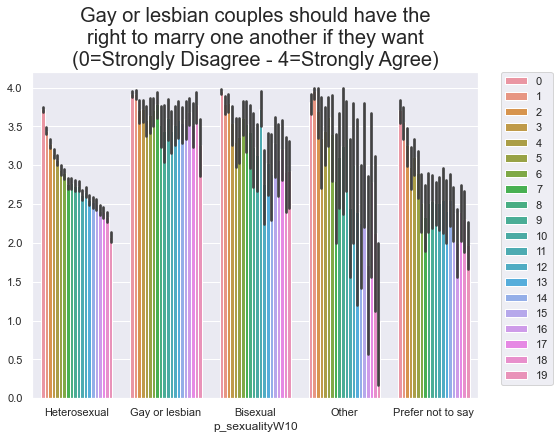

In [394]:
plt.figure(figsize=(8,6))
mask = gayMarriage.notnull()&sexuality_full.notnull()&authoritiarianism.notnull()
sns.barplot(x=sexuality_full[mask],y=gayMarriage[mask],hue=authoritiarianism[mask])
plt.title("Gay or lesbian couples should have the\n"+\
           "right to marry one another if they want\n"+\
           "(0=Strongly Disagree - 4=Strongly Agree)",fontsize=20);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



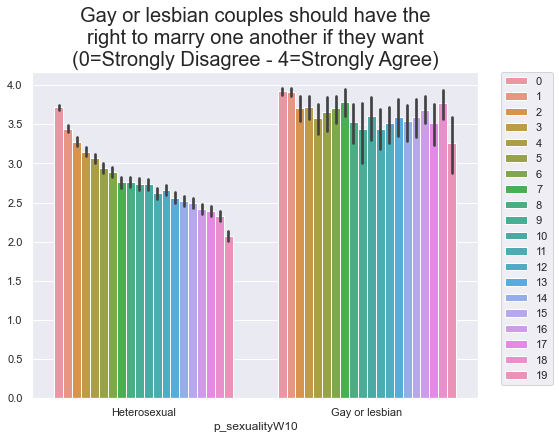

In [92]:
plt.figure(figsize=(8,6))
mask = gayMarriage.notnull()&sexuality.notnull()&authoritiarianism.notnull()
sns.barplot(x=sexuality[mask],y=gayMarriage[mask],hue=authoritiarianism[mask])
plt.title("Gay or lesbian couples should have the\n"+\
           "right to marry one another if they want\n"+\
           "(0=Strongly Disagree - 4=Strongly Agree)",fontsize=20);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [ ]:
### so, best function to 

In [577]:
mask = sexuality=="Heterosexual"
xpos = pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'][mask].groupby(authoritiarianism[mask]).mean()
ypos = gayMarriage[mask].groupby(authoritiarianism[mask]).mean()

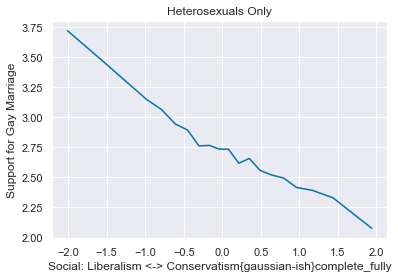

In [579]:
sns.lineplot(xpos,ypos);
plt.ylabel("Support for Gay Marriage");
plt.title("Heterosexuals Only");

In [ ]:
### looks pretty damn close to a line to me (not an evenly distributed sampling - still)

In [104]:
search(BES_Panel,"black|ethnicity")

discussantEthnicity1W2    24933
discussantEthnicity2W2    18238
discussantEthnicity3W2    13210
mapBlackW3                15140
warmBlackW11              30956
blackEqualityW15           5109
blackEqualityW16          37959
blackEqualityW17          34366
p_ethnicityW1             30279
p_ethnicityW2             30160
p_ethnicityW3             28072
p_ethnicityW4             31442
p_ethnicityW5             30822
p_ethnicityW6             30145
p_ethnicityW7             30783
p_ethnicityW8             33443
p_ethnicityW9             30000
p_ethnicityW10            30227
p_ethnicityW11            30925
p_ethnicityW12            34358
p_ethnicityW13            31124
p_ethnicityW14            31015
p_ethnicityW15            30766
p_ethnicityW16            37745
p_ethnicityW17            34013
p_ethnicityW18            37635
p_ethnicityW19            32029
blackEqualityW1_W5        41876
blackEqualityW6_W14       63222
dtype: int64

In [125]:
blackEquality = BES_Panel["blackEqualityW16"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
ethnicity = BES_Panel["p_ethnicityW16"].replace({"Prefer not to say":np.nan,"Other ethnic group":np.nan,
                                                "Any other mixed background":np.nan,"White and Asian":np.nan,
                                                "White and Black Caribbean":np.nan,"Any other Asian background":np.nan,
                                                "Any other black background":np.nan,"White and Black African":np.nan,
                                                "Any other white background":np.nan,
                                                "Indian":"Ethnic minority","Pakistani":"Ethnic minority","Black African":"Ethnic minority",
                                                "Chinese":"Ethnic minority","Black Caribbean":"Ethnic minority","Bangladeshi":"Ethnic minority",
                                                })
ethnicity.value_counts()

White British      33870
Ethnic minority     1280
Name: p_ethnicityW16, dtype: int64

In [114]:
BES_Panel["p_ethnicityW16"].value_counts()

White British                 33870
Any other white background     1474
Indian                          405
Prefer not to say               284
Pakistani                       214
Black African                   193
Chinese                         187
Black Caribbean                 183
Other ethnic group              182
Any other mixed background      181
White and Asian                 157
White and Black Caribbean       117
Any other Asian background      107
Bangladeshi                      98
White and Black African          50
Any other black background       43
Name: p_ethnicityW16, dtype: int64

In [416]:
religion = BES_Panel["p_religionW10"].cat.codes
religion.loc[BES_Panel["p_religionW10"]=="No, I do not regard myself as belonging to any particular religion."]="NO"
religion.loc[BES_Panel["p_religionW10"]!="No, I do not regard myself as belonging to any particular religion."]="YES"
religion.loc[BES_Panel["p_religionW10"].isnull()]=np.nan
# religion.value_counts()
# BES_Panel["p_religionW10"].value_counts()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

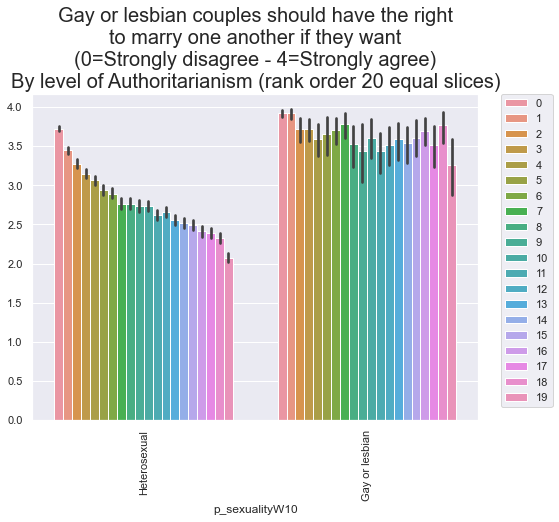

In [576]:
plt.figure(figsize=(8,6))
mask = gayMarriage.notnull()&sexuality.notnull()&authoritiarianism.notnull()
sns.barplot(x=sexuality[mask],y=gayMarriage[mask],hue=authoritiarianism[mask])
plt.title("Gay or lesbian couples should have the right\nto marry one another if they want\n"+\
           "(0=Strongly disagree - 4=Strongly agree)\nBy level of Authoritarianism (rank order 20 equal slices)",fontsize=20);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

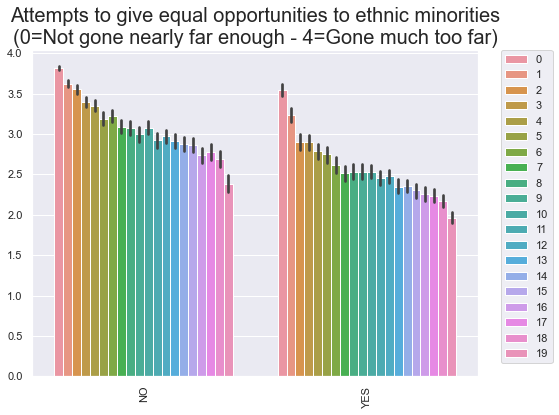

In [417]:
plt.figure(figsize=(8,6))
mask = gayMarriage.notnull()&religion.notnull()&authoritiarianism.notnull()
sns.barplot(x=religion[mask],y=gayMarriage[mask],hue=authoritiarianism[mask])
plt.title("Attempts to give equal opportunities to ethnic minorities\n"+\
           "(0=Not gone nearly far enough - 4=Gone much too far)",fontsize=20);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

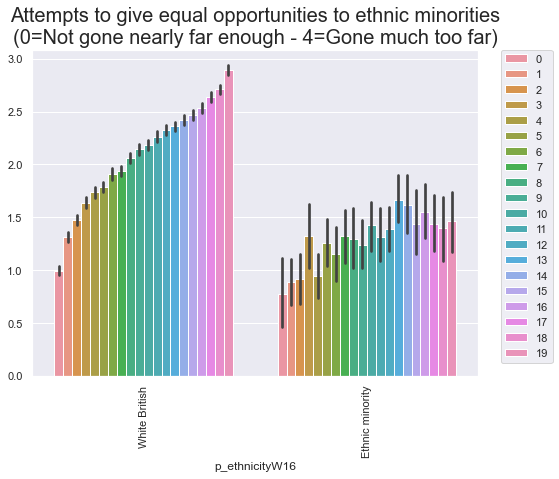

In [127]:
plt.figure(figsize=(8,6))
mask = blackEquality.notnull()&ethnicity.notnull()&authoritiarianism.notnull()
sns.barplot(x=ethnicity[mask],y=blackEquality[mask],hue=authoritiarianism[mask])
plt.title("Attempts to give equal opportunities to ethnic minorities\n"+\
           "(0=Not gone nearly far enough - 4=Gone much too far)",fontsize=20);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(rotation=90)

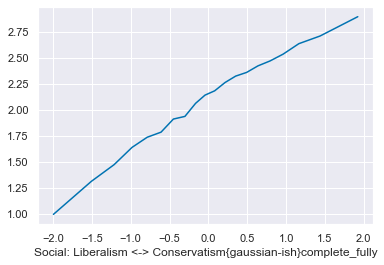

In [128]:
mask = ethnicity=="White British"
xpos = pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'][mask].groupby(authoritiarianism[mask]).mean()
ypos = blackEquality[mask].groupby(authoritiarianism[mask]).mean()
sns.lineplot(xpos,ypos)

In [ ]:
## again, pretty decently linear!

In [ ]:
## maybe try some more later!

In [ ]:
# -> dummy BES_Panel, corrwith

In [139]:
# BES_Panel["blackEqualityW16"]

In [138]:
# (pd.get_dummies(ethnicity)*pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully']).corrwith(blackEquality)

In [136]:
pd.get_dummies(ethnicity).apply(lambda x: x*pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully']).corrwith(blackEquality)
#*pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'])

Ethnic minority    0.014479
White British      0.431624
dtype: float64

In [137]:
pd.get_dummies(sexuality).apply(lambda x: x*pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully']).corrwith(gayMarriage)
#*pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'])

Heterosexual     -0.327062
Gay or lesbian   -0.065730
dtype: float64

In [374]:
# BES_Panel

In [140]:
dummies = pd.get_dummies(BES_Panel)
dummies = dummies.select_dtypes('number')

In [208]:

# dummies = dummies.apply(lambda x: x*pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'])

In [165]:
gayMarriage_auth = gayMarriage/pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully']

In [167]:
corrs = dummies.corrwith(gayMarriage_auth)

In [170]:
corrs.dropna().sort_values()

pconW13_Bromsgrove                 -0.120706
oslauaW13_Bromsgrove               -0.120706
pconW7_Bromsgrove                  -0.115204
oslauaW7_Bromsgrove                -0.115204
mii_catW13_racism/discrimination   -0.112965
                                      ...   
oslauaW7_County Durham              0.058279
propMPChristW14_90                  0.059737
pconW10_North West Durham           0.092600
pconW9_North West Durham            0.111959
pconW7_North West Durham            0.118339
Length: 83333, dtype: float64

In [173]:
pd.get_dummies(sexuality).corrwith(gayMarriage/pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'])

Heterosexual     -0.004232
Gay or lesbian    0.001495
dtype: float64

In [176]:
(pd.get_dummies(sexuality).multiply(pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'],axis=0)).corrwith(gayMarriage)

Heterosexual     -0.327062
Gay or lesbian   -0.065730
dtype: float64

In [177]:
(pd.get_dummies(sexuality).multiply(pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'],axis=0)).corrwith(gayMarriage)

Heterosexual     -0.327062
Gay or lesbian   -0.065730
dtype: float64

In [202]:
# dummies = dummies.multiply(pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'],axis=0)

In [187]:
dummies.dtypes.value_counts()

uint8      84730
float64      123
float32        3
dtype: int64

In [191]:
auth_uint = pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully']

In [192]:
auth_uint = auth_uint-auth_uint.min()

In [194]:
auth_uint = auth_uint/auth_uint.max()

In [197]:
auth_uint = round(auth_uint * 255).astype('uint8')

In [199]:
dummies = dummies.select_dtypes('uint8')

In [200]:
dummies = dummies.multiply(auth_uint,axis=0)

In [203]:
%%time
corrs = dummies.corrwith(gayMarriage)

Wall time: 3min 45s


In [207]:
corrs.dropna().sort_values().tail(20)

# p_work_statW10_Retired: retired
# genderRolesW10_Strongly disagree                    0.210291

likeFarageW10_Strongly dislike                      0.116945
p_eurefvote_Stay in the EU                          0.121192
euPriorityBalanceW10_Access to the single market    0.123946
gayEqualityW17_Not gone far enough                  0.125786
p_paper_readW10_The Guardian                        0.126986
likeUKIPW10_Strongly dislike                        0.128373
gayEqualityW16_Not gone far enough                  0.128981
euRefVoteW10_Stay in the EU                         0.132782
happyEULeaveW10_Extremely disappointed              0.136093
al1W10_W12_Disagree                                 0.138375
immigCulturalW10_Enriches cultural life             0.140590
blackEqualityW6_W14_Not gone far enough             0.140662
euIDW10_The remain side                             0.141354
al2W10_W12_Strongly disagree                        0.144122
gayEqualityW1_W5_Not gone far enough                0.147950
ukCoopMovementW10_Good for Britain                  0.160428
gayEqualityW6_W14_Not go

In [209]:
%%time
corrs_blackEquality = dummies.corrwith(blackEquality)

Wall time: 4min 1s


In [212]:
corrs_blackEquality.dropna().sort_values().tail(20)

dealPriorityImmigW16_Extremely important         0.396225
immigCulturalW16_Undermines cultural life        0.399536
handleEUNegotiateLabW16_Very badly               0.403340
dealVnodealW16_Leave without a deal              0.403499
cancelBrexitW16_Strongly disagree                0.405450
euCitizenW16_No                                  0.409083
EUIntegrationSelfW16_Protect our independence    0.414920
blackEqualityW16_Gone too far                    0.415515
p_ethnicityW16_White British                     0.417891
commonwealthCitizenW16_No                        0.418634
gayEqualityW16_Gone much too far                 0.421543
ukCitizenW16_Yes                                 0.429573
willOfPeopleW16_Strongly agree                   0.433673
p_eurefvote_Leave the EU                         0.437242
otherCitizenW16_No                               0.439039
euRefVoteW16_Leave the EU                        0.445364
remainVnodealW16_Leave without a deal            0.445657
euRefDoOverW16

In [379]:
gayMarriage.groupby(sexuality).corr(authoritiarianism,min_periods=100,method='pearson')

p_sexualityW10
Heterosexual     -0.331342
Gay or lesbian   -0.176367
dtype: float64

In [400]:
gayMarriage.groupby(BES_Panel["p_sexualityW10"]).corr(authoritiarianism,min_periods=200,method='pearson').dropna()

## "Other" for sexuality is weird - maybe people angry at having to choose "Heterosexual"??



p_sexualityW10
Heterosexual        -0.331342
Gay or lesbian      -0.176367
Bisexual            -0.342444
Other               -0.524285
Prefer not to say   -0.359666
dtype: float64

In [388]:
BES_Panel["p_sexualityW10"].value_counts()

Heterosexual         26805
Prefer not to say     1139
Gay or lesbian        1105
Bisexual               912
Other                  275
Name: p_sexualityW10, dtype: int64

In [380]:
blackEquality.groupby(ethnicity).corr(authoritiarianism,min_periods=100,method='pearson')

p_ethnicityW16
Ethnic minority    0.176239
White British      0.450525
dtype: float64

In [399]:
blackEquality.groupby(ethnicity).corr(authoritiarianism,min_periods=200,method='spearman')

p_ethnicityW16
Ethnic minority    0.170085
White British      0.450626
dtype: float64

In [430]:
corrs = blackEquality.groupby(BES_Panel["p_ethnicityW16"]).corr(authoritiarianism,min_periods=100,method='pearson').dropna()
corrs.max() -corrs.min()

0.3441357678807736

In [452]:
search(BES_Panel,"zeroHour|ns_sec_analytic")

zeroHourContractW6           28721
ns_sec_analyticW16W17W18     38586
ns_sec_analyticW19           26107
ns_sec_analyticW1W2W3W4W5    26391
ns_sec_analyticW6W7W8W9      40099
dtype: int64

In [453]:
BES_Panel["ns_sec_analyticW6W7W8W9"]

id
1                                 Intermediate occupations
2        Lower professional and managerial and higher s...
3                                 Semi-routine occupations
4                                                      NaN
5                                                      NaN
                               ...                        
98447                                                  NaN
98448                                                  NaN
98449                                                  NaN
98450                                                  NaN
98451                                                  NaN
Name: ns_sec_analyticW6W7W8W9, Length: 97006, dtype: category
Categories (8, object): ['Employers in large organisations and higher m... < 'Higher professional occupations' < 'Lower professional and managerial and higher ... < 'Intermediate occupations' < 'Employers in small organisations and own acco... < 'Lower supervisory and technical occupat

In [447]:
mainSourceIncomeW11 = BES_Panel["mainSourceIncomeW11"]
mainSourceIncomeW11.value_counts()

Earnings from employment (own or spouse / partner's)      15728
Occupational pension(s) - from previous employer(s)        5421
State retirement or widow's pension(s)                     3919
Invalidity, sickness or disabled pension or benefit(s)     1135
Student grant or loan                                       654
Don't know                                                  488
Other main source                                           484
Interest from savings or investments                        402
Jobseeker's Allowance / Unemployment benefit                358
Income Support or family credit                             319
Dependent on parents/other relatives                        306
Other state benefit                                         247
Name: mainSourceIncomeW11, dtype: int64

In [445]:
welfarePreferenceW11 = BES_Panel["welfarePreferenceW11"].replace({"Don't know":np.nan})
welfarePreferenceW11 = welfarePreferenceW11.cat.codes.replace(-1,np.nan)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

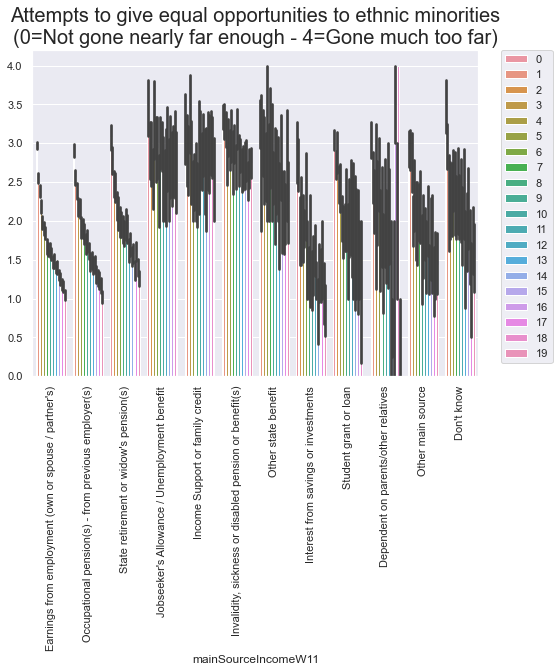

In [448]:
plt.figure(figsize=(8,6))
mask = welfarePreferenceW11.notnull()&mainSourceIncomeW11.notnull()&authoritiarianism.notnull()
sns.barplot(x=mainSourceIncomeW11[mask],y=welfarePreferenceW11[mask],hue=authoritiarianism[mask])
plt.title("Attempts to give equal opportunities to ethnic minorities\n"+\
           "(0=Not gone nearly far enough - 4=Gone much too far)",fontsize=20);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(rotation=90)

In [450]:
welfarePreferenceW11.groupby(mainSourceIncomeW11).corr(authoritiarianism,min_periods=200,method='spearman').sort_values()

mainSourceIncomeW11
Occupational pension(s) - from previous employer(s)      -0.519804
Interest from savings or investments                     -0.516545
Earnings from employment (own or spouse / partner's)     -0.482223
Student grant or loan                                    -0.471818
Other main source                                        -0.448212
Dependent on parents/other relatives                     -0.421163
Don't know                                               -0.362016
State retirement or widow's pension(s)                   -0.360782
Other state benefit                                      -0.271833
Invalidity, sickness or disabled pension or benefit(s)   -0.155766
Jobseeker's Allowance / Unemployment benefit             -0.088143
Income Support or family credit                           0.029288
dtype: float64

In [455]:
search(BES_Panel,"zeroHour|ns_sec_analytic")

zeroHourContractW6           28721
ns_sec_analyticW16W17W18     38586
ns_sec_analyticW19           26107
ns_sec_analyticW1W2W3W4W5    26391
ns_sec_analyticW6W7W8W9      40099
dtype: int64

In [459]:
zeroHourContractW6 = BES_Panel["zeroHourContractW6"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
ns_sec_analyticW6W7W8W9 = BES_Panel["ns_sec_analyticW6W7W8W9"]

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

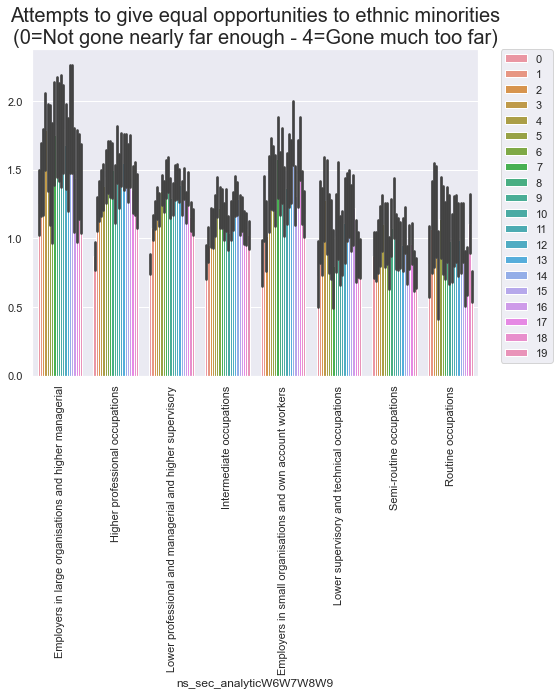

In [460]:
plt.figure(figsize=(8,6))
mask = zeroHourContractW6.notnull()&ns_sec_analyticW6W7W8W9.notnull()&authoritiarianism.notnull()
sns.barplot(x=ns_sec_analyticW6W7W8W9[mask],y=zeroHourContractW6[mask],hue=authoritiarianism[mask])
plt.title("Attempts to give equal opportunities to ethnic minorities\n"+\
           "(0=Not gone nearly far enough - 4=Gone much too far)",fontsize=20);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(rotation=90)

In [571]:
socialCareW13 = BES_Panel["socialCareW13"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
ageGroups = pan_dataset_ages["equalisedAgeGroup_at_W19"]

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

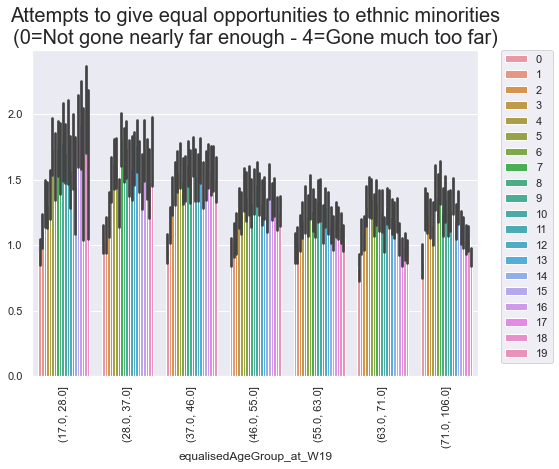

In [572]:
plt.figure(figsize=(8,6))
mask = socialCareW13.notnull()&ageGroups.notnull()&authoritiarianism.notnull()
sns.barplot(x=ageGroups[mask],y=socialCareW13[mask],hue=authoritiarianism[mask])
plt.title("Attempts to give equal opportunities to ethnic minorities\n"+\
           "(0=Not gone nearly far enough - 4=Gone much too far)",fontsize=20);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(rotation=90)

In [573]:
socialCareW13.groupby(ageGroups).corr(authoritiarianism,min_periods=200,method='spearman').sort_values()

equalisedAgeGroup_at_W19
(71.0, 106.0]   -0.092740
(63.0, 71.0]    -0.056487
(55.0, 63.0]    -0.004922
(46.0, 55.0]     0.054281
(37.0, 46.0]     0.114626
(28.0, 37.0]     0.172267
(17.0, 28.0]     0.285400
dtype: float64

In [570]:
socialCareW13.replace(-1,np.nan)

id
1       -1
2        2
3        2
4       -1
5       -1
        ..
98447   -1
98448   -1
98449   -1
98450   -1
98451   -1
Length: 97006, dtype: int8

In [398]:
BES_Panel["p_ethnicityW16"].value_counts()

White British                 33870
Any other white background     1474
Indian                          405
Prefer not to say               284
Pakistani                       214
Black African                   193
Chinese                         187
Black Caribbean                 183
Other ethnic group              182
Any other mixed background      181
White and Asian                 157
White and Black Caribbean       117
Any other Asian background      107
Bangladeshi                      98
White and Black African          50
Any other black background       43
Name: p_ethnicityW16, dtype: int64

In [ ]:
### how about regression?

[0]	validation_0-rmse:1.84331
[1]	validation_0-rmse:1.77662
[2]	validation_0-rmse:1.71340
[3]	validation_0-rmse:1.65404
[4]	validation_0-rmse:1.59894
[5]	validation_0-rmse:1.54717
[6]	validation_0-rmse:1.49900
[7]	validation_0-rmse:1.45411
[8]	validation_0-rmse:1.41200
[9]	validation_0-rmse:1.37310
[10]	validation_0-rmse:1.33661
[11]	validation_0-rmse:1.30293
[12]	validation_0-rmse:1.27179
[13]	validation_0-rmse:1.24286
[14]	validation_0-rmse:1.21603
[15]	validation_0-rmse:1.19144
[16]	validation_0-rmse:1.16888
[17]	validation_0-rmse:1.14790
[18]	validation_0-rmse:1.12869
[19]	validation_0-rmse:1.11101
[20]	validation_0-rmse:1.09475
[21]	validation_0-rmse:1.07957
[22]	validation_0-rmse:1.06563
[23]	validation_0-rmse:1.05284
[24]	validation_0-rmse:1.04098
[25]	validation_0-rmse:1.03020
[26]	validation_0-rmse:1.02036
[27]	validation_0-rmse:1.01143
[28]	validation_0-rmse:1.00312
[29]	validation_0-rmse:0.99526
[30]	validation_0-rmse:0.98821
[31]	validation_0-rmse:0.98184
[32]	validation_0-

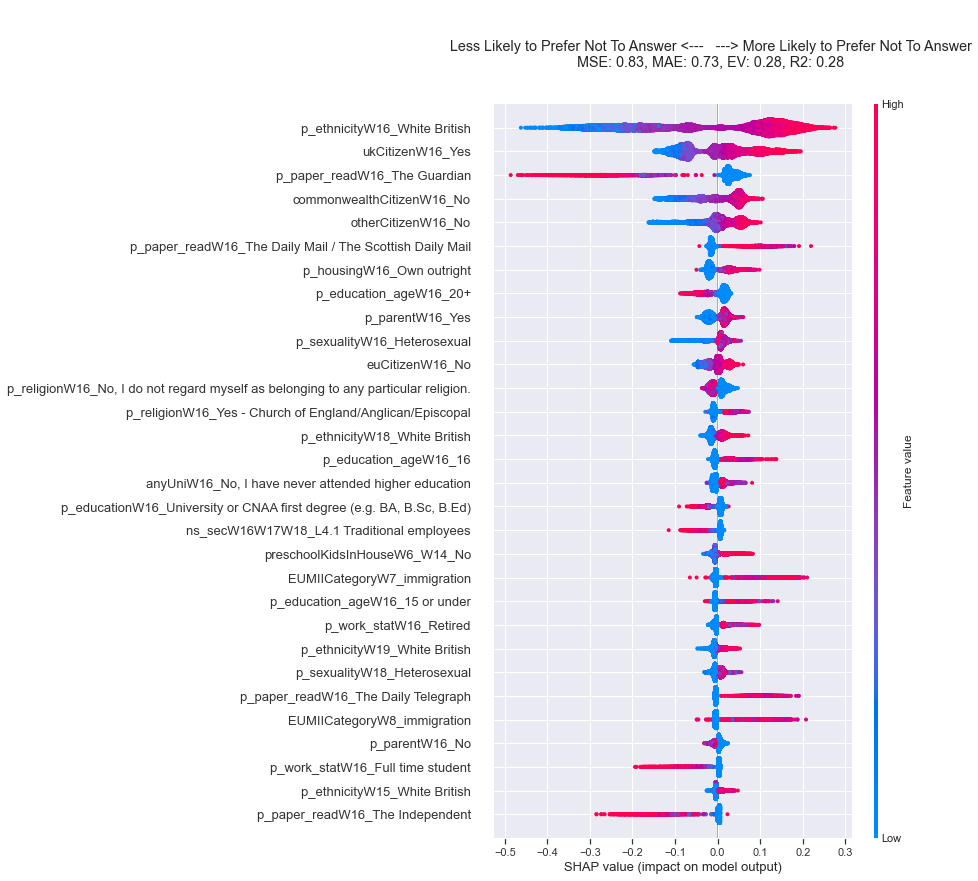

Wall time: 2min 43s


(<shap.explainers._tree.Tree at 0x247d2e7d908>,
 array([[ 0.0000000e+00,  9.4169576e-05, -6.5109627e-05, ...,
          0.0000000e+00,  0.0000000e+00,  7.0733427e-06],
        [ 0.0000000e+00,  5.8669164e-05, -5.1879022e-05, ...,
          0.0000000e+00,  0.0000000e+00, -1.0976934e-04],
        [ 0.0000000e+00,  3.9587991e-05, -6.7307526e-05, ...,
          0.0000000e+00,  0.0000000e+00,  7.0733427e-06],
        ...,
        [ 0.0000000e+00, -3.0863073e-05,  7.4074749e-05, ...,
          0.0000000e+00,  0.0000000e+00,  7.0733427e-06],
        [ 0.0000000e+00, -3.4243621e-05,  1.9082257e-05, ...,
          0.0000000e+00,  0.0000000e+00,  7.0733427e-06],
        [ 0.0000000e+00, -3.9821574e-05,  3.0241350e-05, ...,
          0.0000000e+00,  0.0000000e+00,  7.0733427e-06]], dtype=float32),
 Index(['ukCitizenW1_No', 'ukCitizenW1_Yes', 'euCitizenW1_No',
        'euCitizenW1_Yes', 'commonwealthCitizenW1_No',
        'commonwealthCitizenW1_Yes', 'otherCitizenW1_No', 'otherCitizenW1_Yes',
    

In [405]:
%%time
# search(BES_reduced_with_na,"polAttention")
Treatment = "Auth_black_equality"
var_stub = "blackEquality"

dummies["blackEquality"] = blackEquality

var_list = ["blackEquality"]
var_stub_list = [var_stub]
# BES_reduced_with_na = BES_reduced_with_na.astype('float')
mask = dummies["blackEquality"].notnull()
colname = "blackEquality"
xgboost_run(subdir=colname,dataset=dummies[mask],
            var_list=var_list,var_stub_list=var_stub_list,use_specific_weights=None,
            min_features = min(BES_reduced_with_na.shape[1]-1,30),
            title = "\n\nLess Likely to Prefer Not To Answer <---   ---> More Likely to Prefer Not To Answer")

In [419]:
# dummies.drop("blackEquality",axis=1,inplace=True)
dummies.drop("gayMarriage",axis=1,inplace=True)
dummies.drop("otherSexuality",axis=1,inplace=True)

[0]	validation_0-rmse:2.51161
[1]	validation_0-rmse:2.41166
[2]	validation_0-rmse:2.31794
[3]	validation_0-rmse:2.22945
[4]	validation_0-rmse:2.14707
[5]	validation_0-rmse:2.06974
[6]	validation_0-rmse:1.99693
[7]	validation_0-rmse:1.92878
[8]	validation_0-rmse:1.86449
[9]	validation_0-rmse:1.80451
[10]	validation_0-rmse:1.74853
[11]	validation_0-rmse:1.69656
[12]	validation_0-rmse:1.64791
[13]	validation_0-rmse:1.60310
[14]	validation_0-rmse:1.56114
[15]	validation_0-rmse:1.52223
[16]	validation_0-rmse:1.48616
[17]	validation_0-rmse:1.45281
[18]	validation_0-rmse:1.42190
[19]	validation_0-rmse:1.39341
[20]	validation_0-rmse:1.36689
[21]	validation_0-rmse:1.34223
[22]	validation_0-rmse:1.31966
[23]	validation_0-rmse:1.29935
[24]	validation_0-rmse:1.28045
[25]	validation_0-rmse:1.26279
[26]	validation_0-rmse:1.24666
[27]	validation_0-rmse:1.23182
[28]	validation_0-rmse:1.21832
[29]	validation_0-rmse:1.20585
[30]	validation_0-rmse:1.19427
[31]	validation_0-rmse:1.18379
[32]	validation_0-

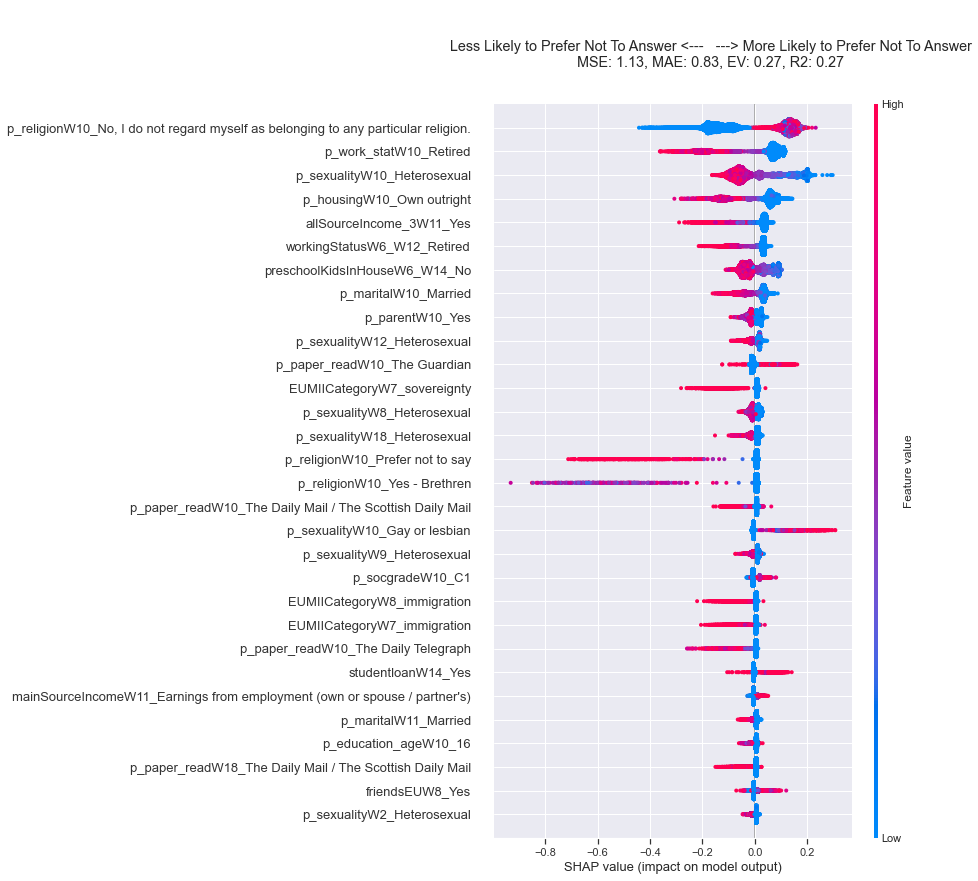

Wall time: 3min 1s


(<shap.explainers._tree.Tree at 0x247ccaef088>,
 array([[ 0.0000000e+00, -1.5701902e-05,  8.2709754e-05, ...,
          0.0000000e+00,  0.0000000e+00, -3.5899752e-06],
        [ 0.0000000e+00,  1.5280077e-04, -9.1367998e-05, ...,
          0.0000000e+00,  0.0000000e+00, -3.5899752e-06],
        [ 0.0000000e+00,  1.2649850e-04,  1.7692894e-04, ...,
          0.0000000e+00,  0.0000000e+00, -6.4570813e-06],
        ...,
        [ 0.0000000e+00,  9.3639927e-04, -1.4855599e-05, ...,
          0.0000000e+00,  0.0000000e+00, -6.4570813e-06],
        [ 0.0000000e+00,  2.4725965e-04, -2.1873519e-05, ...,
          0.0000000e+00,  0.0000000e+00, -3.5899752e-06],
        [ 0.0000000e+00,  2.5320853e-04, -4.0757976e-05, ...,
          0.0000000e+00,  0.0000000e+00, -3.5899752e-06]], dtype=float32),
 Index(['ukCitizenW1_No', 'ukCitizenW1_Yes', 'euCitizenW1_No',
        'euCitizenW1_Yes', 'commonwealthCitizenW1_No',
        'commonwealthCitizenW1_Yes', 'otherCitizenW1_No', 'otherCitizenW1_Yes',
    

In [408]:
%%time
# search(BES_reduced_with_na,"polAttention")
Treatment = "Auth_gay_marriage"
var_stub = "gayMarriage"

dummies["gayMarriage"] = gayMarriage

var_list = ["gayMarriage"]
var_stub_list = [var_stub]
# BES_reduced_with_na = BES_reduced_with_na.astype('float')
mask = dummies["gayMarriage"].notnull()
colname = "gayMarriage"
xgboost_run(subdir=colname,dataset=dummies[mask],
            var_list=var_list,var_stub_list=var_stub_list,use_specific_weights=None,
            min_features = min(BES_reduced_with_na.shape[1]-1,30),
            title = "\n\nLess Likely to Prefer Not To Answer <---   ---> More Likely to Prefer Not To Answer")

In [423]:
BES_Panel["p_sexualityW10"].value_counts(dropna=False)

NaN                  66770
Heterosexual         26805
Prefer not to say     1139
Gay or lesbian        1105
Bisexual               912
Other                  275
Name: p_sexualityW10, dtype: int64

[0]	validation_0-rmse:0.47593
[1]	validation_0-rmse:0.45313
[2]	validation_0-rmse:0.43156
[3]	validation_0-rmse:0.41115
[4]	validation_0-rmse:0.39173
[5]	validation_0-rmse:0.37338
[6]	validation_0-rmse:0.35599
[7]	validation_0-rmse:0.33955
[8]	validation_0-rmse:0.32401
[9]	validation_0-rmse:0.30927
[10]	validation_0-rmse:0.29535
[11]	validation_0-rmse:0.28219
[12]	validation_0-rmse:0.26979
[13]	validation_0-rmse:0.25807
[14]	validation_0-rmse:0.24705
[15]	validation_0-rmse:0.23658
[16]	validation_0-rmse:0.22670
[17]	validation_0-rmse:0.21742
[18]	validation_0-rmse:0.20872
[19]	validation_0-rmse:0.20053
[20]	validation_0-rmse:0.19283
[21]	validation_0-rmse:0.18555
[22]	validation_0-rmse:0.17875
[23]	validation_0-rmse:0.17236
[24]	validation_0-rmse:0.16638
[25]	validation_0-rmse:0.16084
[26]	validation_0-rmse:0.15565
[27]	validation_0-rmse:0.15076
[28]	validation_0-rmse:0.14625
[29]	validation_0-rmse:0.14201
[30]	validation_0-rmse:0.13812
[31]	validation_0-rmse:0.13453
[32]	validation_0-

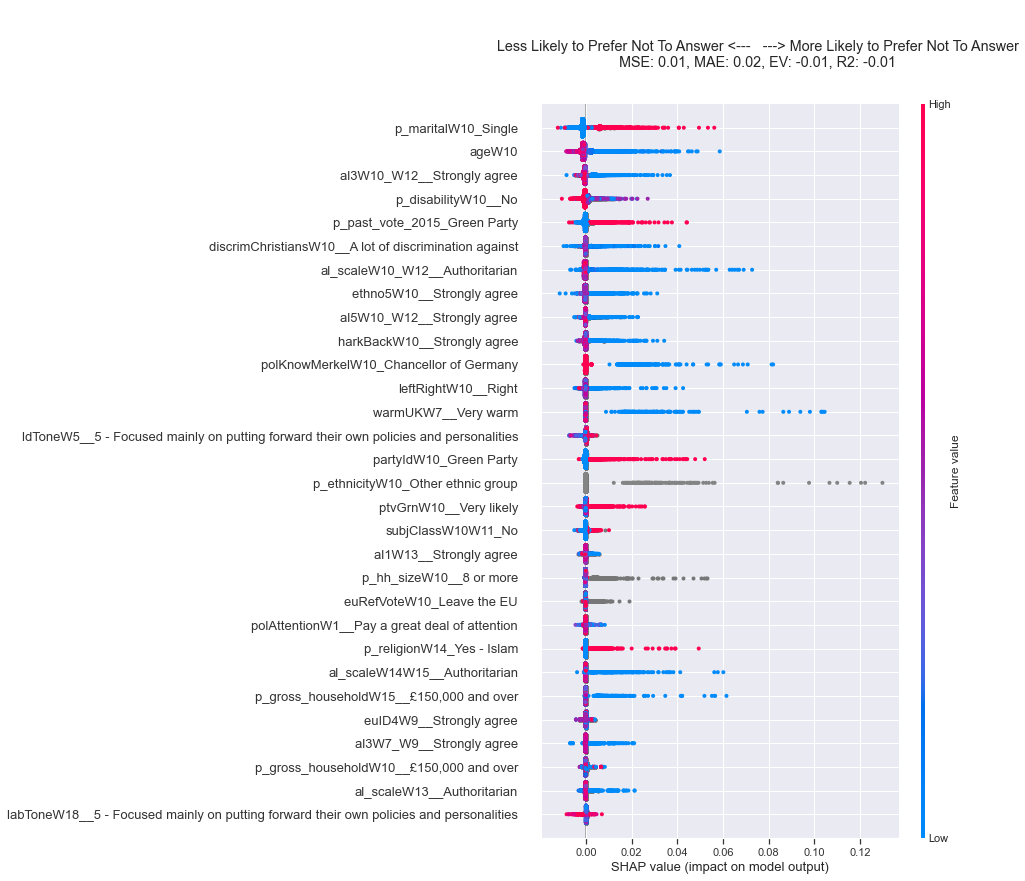

Wall time: 3min 17s


(<shap.explainers._tree.Tree at 0x2491ae163c8>,
 array([[-2.0801415e-06, -7.7521772e-06,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-2.1580622e-06, -7.7521772e-06,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-8.2636052e-06, -7.7521772e-06,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [-2.1580622e-06, -7.7521772e-06,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-2.1580622e-06, -7.7521772e-06,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-2.2379594e-05, -7.7521772e-06,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32),
 Index(['turnoutUKGeneralW1__Very likely that I will vote',
        'turnoutUKGeneralW2__Very likely that I will vote',
        'turnoutUKGeneralW3__Very likely that I will vote',
        'turnoutUKGene

In [425]:
%%time
# search(BES_reduced_with_na,"polAttention")
Treatment = "otherSexuality"
var_stub = "otherSexuality"

BES_reduced_with_na["otherSexuality"] = BES_Panel["p_sexualityW10"]=="Other"
BES_reduced_with_na.loc[BES_Panel["p_sexualityW10"].isnull(),"otherSexuality"] = np.nan

var_list = ["otherSexuality"]
var_stub_list = [var_stub,"p_sexuality"]
# BES_reduced_with_na = BES_reduced_with_na.astype('float')
mask = BES_reduced_with_na["otherSexuality"].notnull()
colname = "otherSexuality"
xgboost_run(subdir=colname,dataset=BES_reduced_with_na[mask],
            var_list=var_list,var_stub_list=var_stub_list,use_specific_weights=None,
            min_features = min(BES_reduced_with_na.shape[1]-1,30),
            title = "\n\nLess Likely to Prefer Not To Answer <---   ---> More Likely to Prefer Not To Answer")

In [421]:
BES_reduced_with_na["otherSexuality"]

id
1        False
2        False
3        False
4        False
5        False
         ...  
98447    False
98448    False
98449    False
98450    False
98451    False
Name: otherSexuality, Length: 97006, dtype: bool

In [491]:
search(BES_reduced_with_na,"zeroHourContractW6")

zeroHourContractW6__Should definitely be legal    27090
dtype: int64

In [409]:
## get baseline correlations with authoritarianism

auth_corrs = BES_reduced_with_na[[x for x in BES_reduced_with_na.columns if ("__" in x)]].corrwith(authoritiarianism)

In [739]:
%%time
demo_stubs = [x for x in pd.Series(list(set([re.match("([a-zA-z0-9\_]*?)W\d+",x).groups()[0] for x in demo_vars]))).values if x not in ["impGender","EUMIICategory"]]
demo_df = pd.DataFrame()
for demo_stub in demo_stubs:
    try:
        demo_df[demo_stub] = amalgamate_waves(BES_Panel, demo_stub)
    except:
        demo_df[demo_stub] = BES_Panel[match(BES_Panel,demo_stub).index[0]]

Amalgamating variables: 
{1: 'ukCitizenW1', 8: 'ukCitizenW8', 14: 'ukCitizenW14', 15: 'ukCitizenW15', 16: 'ukCitizenW16', 17: 'ukCitizenW17'} ['ukCitizenW1', 'ukCitizenW8', 'ukCitizenW14', 'ukCitizenW15', 'ukCitizenW16', 'ukCitizenW17']
Amalgamating variables: 
{6: 'allSourceIncome_8W6', 11: 'allSourceIncome_8W11'} ['allSourceIncome_8W6', 'allSourceIncome_8W11']
Amalgamating variables: 
{1: 'commonwealthCitizenW1', 8: 'commonwealthCitizenW8', 14: 'commonwealthCitizenW14', 15: 'commonwealthCitizenW15', 16: 'commonwealthCitizenW16', 17: 'commonwealthCitizenW17'} ['commonwealthCitizenW1', 'commonwealthCitizenW8', 'commonwealthCitizenW14', 'commonwealthCitizenW15', 'commonwealthCitizenW16', 'commonwealthCitizenW17']
Amalgamating variables: 
{1: 'p_work_statW1', 2: 'p_work_statW2', 3: 'p_work_statW3', 4: 'p_work_statW4', 5: 'p_work_statW5', 6: 'p_work_statW6', 7: 'p_work_statW7', 8: 'p_work_statW8', 9: 'p_work_statW9', 10: 'p_work_statW10', 11: 'p_work_statW11', 12: 'p_work_statW12', 13: 'p

Amalgamating variables: 
{1: 'p_disabilityW1', 2: 'p_disabilityW2', 3: 'p_disabilityW3', 4: 'p_disabilityW4', 5: 'p_disabilityW5', 6: 'p_disabilityW6', 7: 'p_disabilityW7', 8: 'p_disabilityW8', 9: 'p_disabilityW9', 10: 'p_disabilityW10', 11: 'p_disabilityW11', 12: 'p_disabilityW12', 13: 'p_disabilityW13', 14: 'p_disabilityW14', 15: 'p_disabilityW15', 16: 'p_disabilityW16', 17: 'p_disabilityW17', 18: 'p_disabilityW18', 19: 'p_disabilityW19'} ['p_disabilityW1', 'p_disabilityW2', 'p_disabilityW3', 'p_disabilityW4', 'p_disabilityW5', 'p_disabilityW6', 'p_disabilityW7', 'p_disabilityW8', 'p_disabilityW9', 'p_disabilityW10', 'p_disabilityW11', 'p_disabilityW12', 'p_disabilityW13', 'p_disabilityW14', 'p_disabilityW15', 'p_disabilityW16', 'p_disabilityW17', 'p_disabilityW18', 'p_disabilityW19']
Amalgamating variables: 
{6: 'allSourceIncome_7W6', 11: 'allSourceIncome_7W11'} ['allSourceIncome_7W6', 'allSourceIncome_7W11']
Amalgamating variables: 
{1: 'p_gross_personalW1', 2: 'p_gross_personalW2'

Amalgamating variables: 
{19: 'noDependentsInHouseW19', 1: 'noDependentsInHouseW1_W5', 6: 'noDependentsInHouseW6_W14'} ['noDependentsInHouseW1_W5', 'noDependentsInHouseW6_W14', 'noDependentsInHouseW19']
Amalgamating variables: 
{6: 'allSourceIncome_3W6', 11: 'allSourceIncome_3W11'} ['allSourceIncome_3W6', 'allSourceIncome_3W11']
Amalgamating variables: 
{1: 'p_socgradeW1', 2: 'p_socgradeW2', 3: 'p_socgradeW3', 4: 'p_socgradeW4', 5: 'p_socgradeW5', 6: 'p_socgradeW6', 7: 'p_socgradeW7', 8: 'p_socgradeW8', 9: 'p_socgradeW9', 10: 'p_socgradeW10', 11: 'p_socgradeW11', 12: 'p_socgradeW12', 13: 'p_socgradeW13', 14: 'p_socgradeW14', 15: 'p_socgradeW15', 16: 'p_socgradeW16', 17: 'p_socgradeW17', 18: 'p_socgradeW18', 19: 'p_socgradeW19'} ['p_socgradeW1', 'p_socgradeW2', 'p_socgradeW3', 'p_socgradeW4', 'p_socgradeW5', 'p_socgradeW6', 'p_socgradeW7', 'p_socgradeW8', 'p_socgradeW9', 'p_socgradeW10', 'p_socgradeW11', 'p_socgradeW12', 'p_socgradeW13', 'p_socgradeW14', 'p_socgradeW15', 'p_socgradeW16'

In [745]:
demo_df["gender"] = BES_Panel["gender"]
demo_df["ageGroup"] = pan_dataset_ages["equalisedAgeGroup_at_W19"]

In [493]:
drop_list = "|".join(["welfarePreferenceExp","al1","al2","al3","al4","al5","al_scale","anyUni","p_edlevelUni","p_education_age"])
auth_att_vars = [x for x in auth_corrs[auth_corrs.abs()>=.3].index if not re.match(drop_list,x)]
# do we have ageGroups in the demo_vars?

In [507]:
welfarePreferenceW11.groupby(mainSourceIncomeW11).corr(authoritiarianism,min_periods=200,method='spearman').describe().loc[["min","max"]].diff().abs().loc["max"]

0.5490915779091308

In [494]:
# %%time
# raw_dummies = pd.get_dummies(BES_Panel[demo_vars])
# raw_dummies = raw_dummies.select_dtypes('uint8')

Wall time: 2.86 s


In [566]:
def get_corr_spread(x):
    return x.corr(authoritiarianism,min_periods=200,method='spearman').describe().loc[["min","max"]].diff().abs().loc["max"]

# BES_reduced_with_na[auth_att_vars[0]].groupby(BES_Panel[demo_vars[0]]).apply(lambda x: get_corr_spread(x))

In [558]:
search(BES_Panel,"socialCare|ageGroup")

socialCareW13    31136
ageGroup         30589
dtype: int64

In [564]:
pan_dataset_ages["equalisedAgeGroup_at_W19"]

id
1         (63.0, 71.0]
2         (63.0, 71.0]
3        (71.0, 106.0]
4         (55.0, 63.0]
5        (71.0, 106.0]
             ...      
98447     (28.0, 37.0]
98448     (28.0, 37.0]
98449     (28.0, 37.0]
98450     (17.0, 28.0]
98451     (37.0, 46.0]
Name: equalisedAgeGroup_at_W19, Length: 97006, dtype: category
Categories (7, interval[float64]): [(17.0, 28.0] < (28.0, 37.0] < (37.0, 46.0] < (46.0, 55.0] < (55.0, 63.0] < (63.0, 71.0] < (71.0, 106.0]]

In [747]:
%%time
big_corr_divide_df = pd.DataFrame(columns = auth_att_vars, index = demo_vars)
big_N_divide_df = pd.DataFrame(columns = auth_att_vars, index = demo_vars)
big_corr_dict = {}
for att_col in auth_att_vars:
    for demo_col in demo_df.columns:
        big_corr_dict[(att_col,demo_col)] = BES_reduced_with_na[att_col].groupby(demo_df[demo_col].replace("Don't know",np.nan)).corr(authoritiarianism,min_periods=200,method='spearman')
        big_corr_divide_df.loc[demo_col,att_col] = big_corr_dict[(att_col,demo_col)].describe().loc[["min","max"]].diff().abs().loc["max"]
        big_N_divide_df = (BES_reduced_with_na[att_col].notnull()&demo_df[demo_col].replace("Don't know",np.nan).notnull()).sum()

Wall time: 32min 26s


In [757]:
# big_corr_divide_df.drop(["p_edlevel","p_education","p_edlevelUni","p_religion"],inplace=True)

# big_corr_divide_df.drop(["p_paper_read"],inplace=True)


In [751]:
[x for x in demo_df.columns if x not in ["p_edlevel","p_education","p_edlevelUni","p_religion"]]

Index(['ukCitizen', 'allSourceIncome_8', 'rentPayment', 'commonwealthCitizen',
       'p_work_stat', 'p_education_age', 'p_edlevel', 'p_education',
       'passportUK', 'gor', 'mainSourceIncome', 'p_housing',
       'sickElderlyInHouse', 'passportOther', 'studentloan', 'privPrimSchl',
       'p_paper_read', 'p_gross_household', 'p_edlevelUni', 'p_parent',
       'travelEU', 'secondHomeAmtb', 'smallEmergency_4', 'p_disability',
       'allSourceIncome_7', 'parentsForeign', 'p_gross_personal', 'p_hh_size',
       'savingsAmtb', 'smallEmergency_3', 'savings', 'allSourceIncome_6',
       'allSourceIncome_4', 'fatherCountryBorn', 'passportNever',
       'workingStatus', 'smallEmergency_2', 'ns_sec', 'euCitizen',
       'allSourceIncome_11', 'passportExpired', 'smallEmergency_5',
       'motherCountryBorn', 'borrowEssentials', 'numChildren', 'p_ethnicity',
       'otherCitizen', 'mortgagePayment', 'allSourceIncome_5', 'anyUni',
       'livedAbroad', 'allSourceIncome_99', 'debtAmtb', 'debt',


In [746]:
# big_corr_divide_df_old = big_corr_divide_df.copy()
# big_N_divide_df_old = big_N_divide_df.copy()
# big_corr_dict_old = big_corr_dict.copy()

In [808]:
big_corr_divide_df.max().sort_values().tail(98).head(10)

likeUKIPW8__Strongly like                 0.344304
welfarePreferenceW17__Much too low        0.345879
genderRolesW10__Strongly agree            0.345912
likeUKIPW9__Strongly like                 0.346062
strongLeaderW10__Strongly agree           0.346502
euLeaveBigBusinessW7__Much more likely    0.347144
likeSturgeonW12__Strongly like            0.347434
likeUKIPW12__Strongly like                0.348758
econGenProspW19__Get a lot better         0.349679
ptvLabW11__Very likely                    0.351563
dtype: object

In [720]:
# big_corr_divide_df["gayMarriageW10__Strongly agree"]

In [611]:
# BES_Panel["p_religionW11"].groupby(ethnicity).value_counts()

## Brethren almost exclusively ethnic minority - > looks like an even better measure than p_ethnicity (diff degrees of ethnicity?)

## maybe drop p_edlevel/p_education/p_religion

In [ ]:
## gor, smallEmergency_5, p_gross_household, ns_sec_analytic, p_housing, p_socgrade

In [989]:
big_corr_divide_df.loc["p_socgrade"].sort_values().tail(50).head(10)

eesEUIntegrationConW3__Unification should be pushed further    0.183994
leftRightW4__Right                                              0.18411
likeUKIPW9__Strongly like                                      0.185537
handleEUNegotiateW14__Very well                                0.185775
likeGrnW1__Strongly like                                       0.186413
likeConW15__Strongly like                                      0.187295
ptvConW13__Very likely                                         0.187528
childBenefitsRepatriateW7__No, not at any level                 0.18821
preferConMajorityW4__Ranked fifth                              0.189969
approveUKGovtW11__Strongly approve                             0.190656
Name: p_socgrade, dtype: object

In [958]:
big_corr_divide_df["preferMPLGBTW6__A lot more"].dropna().sort_values().tail(10)

gor                  0.182268
friendsEU            0.182326
p_socgrade             0.1993
allSourceIncome_6    0.202128
p_sexuality          0.202748
savings              0.208822
anyUni               0.211864
p_housing            0.235214
ns_sec_analytic      0.330699
ns_sec               0.330699
Name: preferMPLGBTW6__A lot more, dtype: object

In [990]:
big_corr_dict[("childBenefitsRepatriateW7__No, not at any level","p_socgrade")].dropna().sort_index()

p_socgrade
A          0.360840
B          0.376029
C1         0.387765
C2         0.283145
D          0.335144
E          0.297319
Unknown    0.471356
Name: childBenefitsRepatriateW7__No, not at any level, dtype: float64

In [985]:
big_corr_dict[("immigrationLevelW4__Increased a lot","p_socgrade")].dropna().sort_index()

p_socgrade
A         -0.536874
B         -0.551722
C1        -0.527159
C2        -0.430907
D         -0.418375
E         -0.436664
Unknown   -0.631560
Name: immigrationLevelW4__Increased a lot, dtype: float64

In [984]:
big_corr_dict[("authLong1W10__Strongly agree","p_socgrade")].dropna().sort_index()

p_socgrade
A    -0.411374
B    -0.421266
C1   -0.461381
C2   -0.279426
D    -0.253208
E    -0.316631
Name: authLong1W10__Strongly agree, dtype: float64

In [983]:
big_corr_dict[("likeLabW9__Strongly like","p_socgrade")].dropna().sort_index()

p_socgrade
A         -0.367383
B         -0.385609
C1        -0.332729
C2        -0.280959
D         -0.277006
E         -0.259485
Unknown   -0.176843
Name: likeLabW9__Strongly like, dtype: float64

In [981]:
big_corr_dict[("welfarePreferenceW14__Much too low","p_socgrade")].dropna().sort_index()

p_socgrade
A    -0.470364
B    -0.534251
C1   -0.496297
C2   -0.370692
D    -0.335426
E    -0.246792
Name: welfarePreferenceW14__Much too low, dtype: float64

In [979]:
big_corr_dict[("pcGoneMadW15__Need to change the way people talk","p_housing")].dropna().sort_index()

p_housing
Own outright                                                                  -0.295979
Own with a mortgage                                                           -0.310216
Rent from a private landlord                                                  -0.422767
Rent from my local authority                                                  -0.241238
Rent from a housing association                                               -0.186554
Neither I live with my parents, family or friends but pay some rent to them   -0.416008
Neither I live rent-free with my parents, family or friends                   -0.260340
Name: pcGoneMadW15__Need to change the way people talk, dtype: float64

In [976]:
big_corr_dict[("euScepticismW7__Work towards single European government","p_housing")].dropna().sort_index()

p_housing
Own outright                                                                  -0.491902
Own with a mortgage                                                           -0.452884
Rent from a private landlord                                                  -0.513540
Rent from my local authority                                                  -0.261605
Rent from a housing association                                               -0.360107
Neither I live with my parents, family or friends but pay some rent to them   -0.409907
Neither I live rent-free with my parents, family or friends                   -0.343637
Name: euScepticismW7__Work towards single European government, dtype: float64

In [974]:
big_corr_dict[("enviroProtectionW7__Gone much too far","p_housing")].dropna().sort_index()

p_housing
Own outright                                                                   0.297227
Own with a mortgage                                                            0.299280
Rent from a private landlord                                                   0.405590
Rent from my local authority                                                   0.136521
Rent from a housing association                                                0.187294
Neither I live with my parents, family or friends but pay some rent to them    0.377519
Neither I live rent-free with my parents, family or friends                    0.398924
Other                                                                          0.387483
Name: enviroProtectionW7__Gone much too far, dtype: float64

In [972]:
big_corr_dict[("happyLeaveW7__Very happy","p_housing")].dropna().sort_index()
# How will you feel if Britain votes to leave the EU?

p_housing
Own outright                                                                   0.464756
Own with a mortgage                                                            0.501786
Rent from a private landlord                                                   0.540502
Rent from my local authority                                                   0.290824
Rent from a housing association                                                0.417608
Neither I live with my parents, family or friends but pay some rent to them    0.504212
Neither I live rent-free with my parents, family or friends                    0.575729
Name: happyLeaveW7__Very happy, dtype: float64

In [970]:
big_corr_dict[("taxSpendConW15__Government should increase taxes a lot and spend much more on health and social services","p_housing")].dropna().sort_index()

p_housing
Own outright                       0.363000
Own with a mortgage                0.368654
Rent from a private landlord       0.471701
Rent from my local authority       0.181587
Rent from a housing association    0.278019
Name: taxSpendConW15__Government should increase taxes a lot and spend much more on health and social services, dtype: float64

In [967]:
big_corr_dict[("leftRightW7__Right","p_housing")].dropna().sort_index()

p_housing
Own outright                                                                   0.461939
Own with a mortgage                                                            0.462448
Rent from a private landlord                                                   0.514648
Rent from my local authority                                                   0.337675
Rent from a housing association                                                0.392282
Neither I live with my parents, family or friends but pay some rent to them    0.544657
Neither I live rent-free with my parents, family or friends                    0.517153
Other                                                                          0.577169
Name: leftRightW7__Right, dtype: float64

In [965]:
big_corr_dict[("genderRolesW10__Strongly agree","ns_sec_analytic")].dropna().sort_index()

## more likely to have/be a housewife?

ns_sec_analytic
Employers in large organisations and higher managerial      0.428922
Higher professional occupations                             0.399934
Lower professional and managerial and higher supervisory    0.333380
Intermediate occupations                                    0.252252
Employers in small organisations and own account workers    0.322809
Lower supervisory and technical occupations                 0.204859
Semi-routine occupations                                    0.247708
Routine occupations                                         0.178231
Name: genderRolesW10__Strongly agree, dtype: float64

In [960]:
big_corr_dict[("approveUKGovtW14__Strongly approve","ns_sec_analytic")].dropna().sort_index()

ns_sec_analytic
Employers in large organisations and higher managerial      0.325730
Higher professional occupations                             0.470768
Lower professional and managerial and higher supervisory    0.398366
Intermediate occupations                                    0.264852
Employers in small organisations and own account workers    0.322952
Lower supervisory and technical occupations                 0.167604
Semi-routine occupations                                    0.197715
Routine occupations                                         0.143225
Name: approveUKGovtW14__Strongly approve, dtype: float64

In [959]:
big_corr_dict[("preferMPLGBTW6__A lot more","ns_sec_analytic")].dropna().sort_index()

ns_sec_analytic
Employers in large organisations and higher managerial     -0.462633
Higher professional occupations                            -0.559763
Lower professional and managerial and higher supervisory   -0.427755
Intermediate occupations                                   -0.413495
Employers in small organisations and own account workers   -0.348231
Lower supervisory and technical occupations                -0.229064
Semi-routine occupations                                   -0.342299
Routine occupations                                        -0.305199
Name: preferMPLGBTW6__A lot more, dtype: float64

In [956]:
big_corr_dict[("ptvGrnW18__Very likely","ns_sec_analytic")].dropna().sort_index()

ns_sec_analytic
Employers in large organisations and higher managerial     -0.198967
Higher professional occupations                            -0.435190
Lower professional and managerial and higher supervisory   -0.382556
Intermediate occupations                                   -0.363797
Employers in small organisations and own account workers   -0.312031
Lower supervisory and technical occupations                -0.304355
Semi-routine occupations                                   -0.315792
Routine occupations                                        -0.307098
Name: ptvGrnW18__Very likely, dtype: float64

In [955]:
big_corr_dict[("leftRightW17__Right","ns_sec_analytic")].dropna().sort_index()

ns_sec_analytic
Employers in large organisations and higher managerial      0.421871
Higher professional occupations                             0.548920
Lower professional and managerial and higher supervisory    0.504645
Intermediate occupations                                    0.430702
Employers in small organisations and own account workers    0.436959
Lower supervisory and technical occupations                 0.367473
Semi-routine occupations                                    0.403712
Routine occupations                                         0.310787
Name: leftRightW17__Right, dtype: float64

In [954]:
big_corr_dict[("ptvConW17__Very likely","ns_sec_analytic")].dropna().sort_index()

ns_sec_analytic
Employers in large organisations and higher managerial      0.377653
Higher professional occupations                             0.490020
Lower professional and managerial and higher supervisory    0.431807
Intermediate occupations                                    0.345503
Employers in small organisations and own account workers    0.381835
Lower supervisory and technical occupations                 0.251962
Semi-routine occupations                                    0.295244
Routine occupations                                         0.251079
Name: ptvConW17__Very likely, dtype: float64

In [951]:
big_corr_dict[("preferConMajorityW5__Ranked fifth","ns_sec_analytic")].dropna().sort_index()

ns_sec_analytic
Employers in large organisations and higher managerial     -0.347623
Higher professional occupations                            -0.439612
Lower professional and managerial and higher supervisory   -0.381731
Intermediate occupations                                   -0.318855
Employers in small organisations and own account workers   -0.329763
Lower supervisory and technical occupations                -0.198689
Semi-routine occupations                                   -0.235973
Routine occupations                                        -0.249426
Name: preferConMajorityW5__Ranked fifth, dtype: float64

In [950]:
big_corr_dict[("preferConMajorityW5__Ranked fifth","p_housing")].dropna().sort_index()

p_housing
Own outright                                                                  -0.348459
Own with a mortgage                                                           -0.329553
Rent from a private landlord                                                  -0.360441
Rent from my local authority                                                  -0.148051
Rent from a housing association                                               -0.193242
Neither I live with my parents, family or friends but pay some rent to them   -0.349547
Neither I live rent-free with my parents, family or friends                   -0.402377
Other                                                                         -0.419807
Name: preferConMajorityW5__Ranked fifth, dtype: float64

In [947]:
big_corr_dict[("govtHandoutsW1__Strongly agree","p_gross_household")].dropna().sort_index()

p_gross_household
under £5,000 per year            0.461961
£5,000 to £9,999 per year        0.373447
£10,000 to £14,999 per year      0.377183
£15,000 to £19,999 per year      0.427772
£20,000 to £24,999 per year      0.479920
£25,000 to £29,999 per year      0.464654
£30,000 to £34,999 per year      0.492978
£35,000 to £39,999 per year      0.527503
£40,000 to £44,999 per year      0.486101
£45,000 to £49,999 per year      0.501009
£50,000 to £59,999 per year      0.565261
£60,000 to £69,999 per year      0.525323
£70,000 to £99,999 per year      0.540760
£100,000 to £149,999 per year    0.518214
£150,000 and over                0.605858
Prefer not to answer             0.444812
Name: govtHandoutsW1__Strongly agree, dtype: float64

In [940]:
big_corr_dict[("happyTrumpW10__Extremely happy","ns_sec_analytic")].dropna().sort_index()

ns_sec_analytic
Employers in large organisations and higher managerial      0.350150
Higher professional occupations                             0.416370
Lower professional and managerial and higher supervisory    0.349572
Intermediate occupations                                    0.273506
Employers in small organisations and own account workers    0.332541
Lower supervisory and technical occupations                 0.221988
Semi-routine occupations                                    0.245105
Routine occupations                                         0.182010
Name: happyTrumpW10__Extremely happy, dtype: float64

In [939]:
big_corr_dict[("happyTrumpW10__Extremely happy","homeAmtb")].dropna().sort_index()

homeAmtb
£50,000-£99,999                   0.215957
£100,000-£149,999                 0.287520
£150,000-£199,999                 0.326345
£200,000-£249,999                 0.306840
£250,000-£299,999                 0.338732
£300,000-£399,999                 0.382162
£400,000-£499,999                 0.358468
£500,000-£599,999                 0.438377
£600,000-£699,999                 0.493403
Don't know / Prefer not to say    0.281433
Name: happyTrumpW10__Extremely happy, dtype: float64

In [938]:
big_corr_dict[("happyTrumpW10__Extremely happy","p_gross_household")].dropna().sort_index()

p_gross_household
under £5,000 per year            0.207308
£5,000 to £9,999 per year        0.235452
£10,000 to £14,999 per year      0.244156
£15,000 to £19,999 per year      0.278844
£20,000 to £24,999 per year      0.304098
£25,000 to £29,999 per year      0.325102
£30,000 to £34,999 per year      0.350118
£35,000 to £39,999 per year      0.334495
£40,000 to £44,999 per year      0.355084
£45,000 to £49,999 per year      0.407669
£50,000 to £59,999 per year      0.350374
£60,000 to £69,999 per year      0.416090
£70,000 to £99,999 per year      0.406377
£100,000 to £149,999 per year    0.375926
£150,000 and over                0.453131
Prefer not to answer             0.273618
Name: happyTrumpW10__Extremely happy, dtype: float64

In [935]:
big_corr_dict[("likeBerryW15__Strongly like","p_gross_household")].dropna().sort_index()

p_gross_household
£5,000 to £9,999 per year     -0.179853
£10,000 to £14,999 per year   -0.284350
£15,000 to £19,999 per year   -0.272573
£20,000 to £24,999 per year   -0.326065
£25,000 to £29,999 per year   -0.319717
£30,000 to £34,999 per year   -0.328182
£35,000 to £39,999 per year   -0.451705
£40,000 to £44,999 per year   -0.335166
£45,000 to £49,999 per year   -0.298864
£50,000 to £59,999 per year   -0.385599
£70,000 to £99,999 per year   -0.333014
Prefer not to answer          -0.298221
Name: likeBerryW15__Strongly like, dtype: float64

In [932]:
big_corr_dict[("grammarW11__Strongly support","p_gross_household")].dropna().sort_index()

p_gross_household
under £5,000 per year            0.336607
£5,000 to £9,999 per year        0.355116
£10,000 to £14,999 per year      0.323315
£15,000 to £19,999 per year      0.378913
£20,000 to £24,999 per year      0.387749
£25,000 to £29,999 per year      0.447698
£30,000 to £34,999 per year      0.476848
£35,000 to £39,999 per year      0.460312
£40,000 to £44,999 per year      0.455046
£45,000 to £49,999 per year      0.467561
£50,000 to £59,999 per year      0.450452
£60,000 to £69,999 per year      0.457232
£70,000 to £99,999 per year      0.491187
£100,000 to £149,999 per year    0.528676
£150,000 and over                0.629244
Prefer not to answer             0.390382
Name: grammarW11__Strongly support, dtype: float64

In [931]:
big_corr_dict[("likeConW6__Strongly like","p_gross_household")].dropna().sort_index()

p_gross_household
under £5,000 per year            0.132464
£5,000 to £9,999 per year        0.158987
£10,000 to £14,999 per year      0.206591
£15,000 to £19,999 per year      0.250165
£20,000 to £24,999 per year      0.307123
£25,000 to £29,999 per year      0.322186
£30,000 to £34,999 per year      0.362277
£35,000 to £39,999 per year      0.337360
£40,000 to £44,999 per year      0.331063
£45,000 to £49,999 per year      0.364967
£50,000 to £59,999 per year      0.433692
£60,000 to £69,999 per year      0.416254
£70,000 to £99,999 per year      0.431258
£100,000 to £149,999 per year    0.542266
Prefer not to answer             0.271883
Name: likeConW6__Strongly like, dtype: float64

In [926]:
big_corr_dict[("likeConW18__Strongly like","smallEmergency_5")].dropna().sort_index()

smallEmergency_5
No     0.450325
Yes    0.277692
Name: likeConW18__Strongly like, dtype: float64

In [925]:
big_corr_dict[("likeConW18__Strongly like","ns_sec_analytic")].dropna().sort_index()

ns_sec_analytic
Employers in large organisations and higher managerial      0.431098
Higher professional occupations                             0.511501
Lower professional and managerial and higher supervisory    0.453441
Intermediate occupations                                    0.379780
Employers in small organisations and own account workers    0.423140
Lower supervisory and technical occupations                 0.299569
Semi-routine occupations                                    0.320994
Routine occupations                                         0.250299
Name: likeConW18__Strongly like, dtype: float64

In [922]:
big_corr_dict[("sdodominance2W15__Strongly favour","ns_sec_analytic")].dropna().sort_index()
# Some groups of people are simply inferior to other groups.

ns_sec_analytic
Higher professional occupations                             0.429443
Lower professional and managerial and higher supervisory    0.361212
Intermediate occupations                                    0.378014
Employers in small organisations and own account workers    0.333033
Lower supervisory and technical occupations                 0.158793
Semi-routine occupations                                    0.203692
Routine occupations                                         0.224767
Name: sdodominance2W15__Strongly favour, dtype: float64

In [921]:
big_corr_dict[("sdodominance2W15__Strongly favour","smallEmergency_5")].dropna().sort_index()
# Some groups of people are simply inferior to other groups.

smallEmergency_5
No     0.359697
Yes    0.182573
Name: sdodominance2W15__Strongly favour, dtype: float64

In [918]:
big_corr_dict[("integrityBorisW19__Complete integrity","smallEmergency_5")].dropna().sort_index()

smallEmergency_5
No     0.462688
Yes    0.248809
Name: integrityBorisW19__Complete integrity, dtype: float64

In [912]:
big_corr_dict[("aom7W7__Strongly agree","mainSourceIncome")].dropna().sort_index()
# One should disregard evidence that conflicts with one's established beliefs

mainSourceIncome
Earnings from employment (own or spouse / partner's)    0.363049
Occupational pension(s) - from previous employer(s)     0.378555
State retirement or widow's pension(s)                  0.140615
Name: aom7W7__Strongly agree, dtype: float64

In [907]:
big_corr_dict[("ptvLDW18__Very likely","studentloan")].dropna().sort_index()

studentloan
No    -0.309320
Yes   -0.114179
Name: ptvLDW18__Very likely, dtype: float64

In [906]:
big_corr_dict[("ptvLDW18__Very likely","p_ethnicity")].dropna().sort_index()

p_ethnicity
White British                -0.326084
Any other white background   -0.080290
Name: ptvLDW18__Very likely, dtype: float64

In [902]:
big_corr_dict[("authLong1W10__Strongly agree","gor")].dropna().sort_index()
# It is more important for a child to have independence than respect for elders.

gor
North East                 -0.267675
North West                 -0.394834
Yorkshire and The Humber   -0.332005
East Midlands              -0.345251
West Midlands              -0.361626
East of England            -0.381809
London                     -0.347721
South East                 -0.354593
South West                 -0.347704
Wales                      -0.365149
Scotland                   -0.500257
Name: authLong1W10__Strongly agree, dtype: float64

In [900]:
big_corr_dict[("hostileSexism3W19__Strongly agree","gor")].dropna().sort_index()

gor
North East                  0.348912
North West                  0.333599
Yorkshire and The Humber    0.441621
East Midlands               0.348805
West Midlands               0.233072
East of England             0.332465
London                      0.477255
South East                  0.329244
South West                  0.358182
Wales                       0.399233
Scotland                    0.415133
Name: hostileSexism3W19__Strongly agree, dtype: float64

In [896]:
big_corr_dict[("hostileSexism3W19__Strongly agree","p_sexuality")].dropna().sort_index()

p_sexuality
Heterosexual         0.335803
Gay or lesbian       0.428411
Bisexual             0.580996
Prefer not to say    0.454483
Name: hostileSexism3W19__Strongly agree, dtype: float64

In [889]:
big_corr_dict[("ptvLabW7__Very likely","gor")].dropna().sort_index()
# ptvLab7-12

gor
North East                 -0.317921
North West                 -0.336392
Yorkshire and The Humber   -0.316107
East Midlands              -0.333111
West Midlands              -0.352842
East of England            -0.394521
London                     -0.443137
South East                 -0.405761
South West                 -0.393888
Wales                      -0.342986
Scotland                   -0.177532
Name: ptvLabW7__Very likely, dtype: float64

In [888]:
big_corr_dict[("ptvLabW7__Very likely","homeAmtb")].dropna().sort_index()

homeAmtb
£50,000-£99,999                  -0.245876
£100,000-£149,999                -0.286871
£150,000-£199,999                -0.286455
£200,000-£249,999                -0.398361
£250,000-£299,999                -0.311017
£300,000-£399,999                -0.450812
£400,000-£499,999                -0.461528
£500,000-£599,999                -0.472813
£600,000-£699,999                -0.517907
Don't know / Prefer not to say   -0.359485
Name: ptvLabW7__Very likely, dtype: float64

In [882]:
big_corr_dict[("grnToneW12__5 - Focused mainly on putting forward their own policies and personalities","gor")].dropna().sort_index()

gor
North East                 -0.268774
North West                 -0.342381
Yorkshire and The Humber   -0.292539
East Midlands              -0.254310
West Midlands              -0.304647
East of England            -0.281155
London                     -0.357453
South East                 -0.352709
South West                 -0.338953
Wales                      -0.526635
Scotland                   -0.357064
Name: grnToneW12__5 - Focused mainly on putting forward their own policies and personalities, dtype: float64

In [880]:
big_corr_dict[("likeMoggW14__Strongly like","gor")].dropna().sort_index()

gor
North East                  0.270791
North West                  0.357162
Yorkshire and The Humber    0.381876
East Midlands               0.311092
West Midlands               0.372333
East of England             0.350718
London                      0.570932
South East                  0.423846
South West                  0.345820
Wales                       0.430094
Scotland                    0.405884
Name: likeMoggW14__Strongly like, dtype: float64

In [879]:
big_corr_dict[("likeMoggW14__Strongly like","p_education_age")].dropna().sort_index()

p_education_age
15 or under    0.164726
16             0.214770
17-18          0.323203
19             0.389846
20+            0.478350
Name: likeMoggW14__Strongly like, dtype: float64

In [877]:
big_corr_dict[("englishnessW9__Very strongly English","gor")].dropna().sort_index()

gor
North East                  0.432029
North West                  0.432757
Yorkshire and The Humber    0.455804
East Midlands               0.383034
West Midlands               0.417271
East of England             0.423743
London                      0.363841
South East                  0.424165
South West                  0.387959
Wales                       0.108199
Scotland                    0.004303
Name: englishnessW9__Very strongly English, dtype: float64

In [874]:
big_corr_dict[("gayEqualityW1_W5__Gone much too far","gender")].dropna().sort_index()

gender
Male      0.420867
Female    0.321344
Name: gayEqualityW1_W5__Gone much too far, dtype: float64

In [858]:
big_corr_dict[("populism5W15__Strongly agree","ageGroup")].dropna().sort_index()

ageGroup
(17.0, 28.0]     0.195948
(28.0, 37.0]     0.261362
(37.0, 46.0]     0.281098
(46.0, 55.0]     0.317205
(55.0, 63.0]     0.351304
(63.0, 71.0]     0.403136
(71.0, 106.0]    0.406075
Name: populism5W15__Strongly agree, dtype: float64

In [849]:
big_corr_dict[("ethno4W9__Strongly agree","gor")].dropna().sort_index()

gor
North East                  0.245637
North West                  0.301120
Yorkshire and The Humber    0.137837
East Midlands               0.293232
West Midlands               0.252979
East of England             0.278123
London                      0.410419
South East                  0.306669
South West                  0.311278
Wales                       0.349245
Scotland                    0.426218
Name: ethno4W9__Strongly agree, dtype: float64

In [846]:
big_corr_dict[("warmEasternW11__Very warm","p_work_stat")].dropna().sort_index()

p_work_stat
Working full time (30 or more hours per week)   -0.498919
Working part time (8-29 hours a week)           -0.493836
Full time student                               -0.232467
Retired                                         -0.524391
Not working                                     -0.531851
Name: warmEasternW11__Very warm, dtype: float64

In [838]:
big_corr_dict[("EUIntegrationSelfW18__Protect our independence","homeAmtb")].dropna().sort_index()

homeAmtb
£50,000-£99,999                   0.393190
£100,000-£149,999                 0.488907
£150,000-£199,999                 0.484379
£200,000-£249,999                 0.487517
£250,000-£299,999                 0.464945
£300,000-£399,999                 0.495660
£400,000-£499,999                 0.515423
£500,000-£599,999                 0.504429
£600,000-£699,999                 0.559856
Don't know / Prefer not to say    0.456028
Name: EUIntegrationSelfW18__Protect our independence, dtype: float64

In [825]:
big_corr_dict[("germanyFairShareW8__Much more than its fair share","ageGroup")].dropna().sort_index()

ageGroup
(17.0, 28.0]     0.153721
(28.0, 37.0]     0.225508
(37.0, 46.0]     0.241570
(46.0, 55.0]     0.293816
(55.0, 63.0]     0.341980
(63.0, 71.0]     0.393090
(71.0, 106.0]    0.358789
Name: germanyFairShareW8__Much more than its fair share, dtype: float64

In [821]:
big_corr_dict[("brexitNextPrefW19__Leave with no deal","smallEmergency_5")].dropna().sort_index()

smallEmergency_5
No     0.399200
Yes    0.183903
Name: brexitNextPrefW19__Leave with no deal, dtype: float64

In [820]:
big_corr_dict[("brexitNextPrefW19__Leave with no deal","ageGroup")].dropna().sort_index()

ageGroup
(17.0, 28.0]     0.108959
(28.0, 37.0]     0.276958
(37.0, 46.0]     0.280332
(46.0, 55.0]     0.316154
(55.0, 63.0]     0.344063
(63.0, 71.0]     0.360780
(71.0, 106.0]    0.361288
Name: brexitNextPrefW19__Leave with no deal, dtype: float64

In [818]:
big_corr_dict[("lrUKIPW9__Right","p_gross_household")].dropna().sort_index()

p_gross_household
£5,000 to £9,999 per year     -0.467322
£10,000 to £14,999 per year   -0.379831
£15,000 to £19,999 per year   -0.322484
£20,000 to £24,999 per year   -0.398343
£25,000 to £29,999 per year   -0.389427
£30,000 to £34,999 per year   -0.376146
£35,000 to £39,999 per year   -0.414959
£40,000 to £44,999 per year   -0.324700
£45,000 to £49,999 per year   -0.266198
£50,000 to £59,999 per year   -0.297192
£60,000 to £69,999 per year   -0.204326
£70,000 to £99,999 per year   -0.212551
Prefer not to answer          -0.355556
Name: lrUKIPW9__Right, dtype: float64

In [817]:
big_corr_dict[("lrUKIPW9__Right","ageGroup")].dropna().sort_index()

ageGroup
(17.0, 28.0]    -0.158887
(28.0, 37.0]    -0.215510
(37.0, 46.0]    -0.264330
(46.0, 55.0]    -0.337633
(55.0, 63.0]    -0.402099
(63.0, 71.0]    -0.430003
(71.0, 106.0]   -0.367393
Name: lrUKIPW9__Right, dtype: float64

In [815]:
big_corr_dict[("populism1W11__Strongly agree","ageGroup")].dropna().sort_index()

ageGroup
(17.0, 28.0]     0.143882
(28.0, 37.0]     0.268264
(37.0, 46.0]     0.297738
(46.0, 55.0]     0.390844
(55.0, 63.0]     0.412510
(63.0, 71.0]     0.457541
(71.0, 106.0]    0.396768
Name: populism1W11__Strongly agree, dtype: float64

In [807]:
big_corr_dict[("ptvConW10__Very likely","ns_sec_analytic")].dropna().sort_index()

ns_sec_analytic
Employers in large organisations and higher managerial      0.425847
Higher professional occupations                             0.472017
Lower professional and managerial and higher supervisory    0.393615
Intermediate occupations                                    0.311160
Employers in small organisations and own account workers    0.347056
Lower supervisory and technical occupations                 0.170350
Semi-routine occupations                                    0.210794
Routine occupations                                         0.119733
Name: ptvConW10__Very likely, dtype: float64

In [805]:
big_corr_dict[("taxSpendConW15__Government should increase taxes a lot and spend much more on health and social services","p_education_age")].dropna().sort_index()

p_education_age
15 or under    0.101742
16             0.213911
17-18          0.263766
19             0.228228
20+            0.460071
Name: taxSpendConW15__Government should increase taxes a lot and spend much more on health and social services, dtype: float64

In [801]:
big_corr_dict[("tuitionFeesTooFarW13__Gone much too far","secondHomeAmtb")].dropna().sort_index()

## because 2nd home low value because student house for kid???

secondHomeAmtb
£50,000-£99,999                  -0.164365
£100,000-£149,999                -0.327255
£150,000-£199,999                -0.417272
Don't know / Prefer not to say   -0.273185
Name: tuitionFeesTooFarW13__Gone much too far, dtype: float64

In [800]:
big_corr_dict[("tuitionFeesTooFarW13__Gone much too far","mainSourceIncome")].dropna().sort_index()

## very 'welfare' like profile

mainSourceIncome
Earnings from employment (own or spouse / partner's)     -0.332157
Occupational pension(s) - from previous employer(s)      -0.339677
State retirement or widow's pension(s)                   -0.241147
Jobseeker's Allowance / Unemployment benefit             -0.087114
Income Support or family credit                          -0.034472
Invalidity, sickness or disabled pension or benefit(s)   -0.327040
Interest from savings or investments                     -0.229141
Student grant or loan                                    -0.255350
Other main source                                        -0.323009
Name: tuitionFeesTooFarW13__Gone much too far, dtype: float64

In [799]:
big_corr_dict[("tuitionFeesTooFarW13__Gone much too far","p_ethnicity")].dropna().sort_index()


### ??? Why ???

p_ethnicity
White British                -0.323240
Any other white background   -0.342494
Indian                        0.018744
Prefer not to say            -0.270276
Name: tuitionFeesTooFarW13__Gone much too far, dtype: float64

In [797]:
big_corr_dict[("changeEconomyW9__Getting a lot better","p_housing")].dropna().sort_index()

p_housing
Own outright                                                                   0.331582
Own with a mortgage                                                            0.361416
Rent from a private landlord                                                   0.423872
Rent from my local authority                                                   0.209625
Rent from a housing association                                                0.301015
Neither I live with my parents, family or friends but pay some rent to them    0.306281
Neither I live rent-free with my parents, family or friends                    0.392293
Other                                                                          0.477916
Name: changeEconomyW9__Getting a lot better, dtype: float64

In [796]:
big_corr_dict[("changeEconomyW9__Getting a lot better","p_ethnicity")].dropna().sort_index()

p_ethnicity
White British                 0.352533
Any other white background    0.407839
Indian                        0.045101
Prefer not to say             0.403362
Name: changeEconomyW9__Getting a lot better, dtype: float64

In [793]:
big_corr_dict[("britFeelBritishW11__Very important","mainSourceIncome")].dropna().sort_index()



# ????

mainSourceIncome
Earnings from employment (own or spouse / partner's)      0.316426
Occupational pension(s) - from previous employer(s)       0.360722
State retirement or widow's pension(s)                    0.333635
Jobseeker's Allowance / Unemployment benefit              0.367945
Income Support or family credit                           0.298124
Invalidity, sickness or disabled pension or benefit(s)    0.322808
Other state benefit                                       0.479958
Interest from savings or investments                      0.336771
Student grant or loan                                     0.155377
Dependent on parents/other relatives                      0.111069
Other main source                                         0.347402
Name: britFeelBritishW11__Very important, dtype: float64

In [790]:
big_corr_dict[("likeMayW14__Strongly like","homeAmtb")].dropna().sort_index()

homeAmtb
£0-£49,999                        0.192662
£50,000-£99,999                   0.269435
£100,000-£149,999                 0.281368
£150,000-£199,999                 0.325859
£200,000-£249,999                 0.386546
£250,000-£299,999                 0.348286
£300,000-£399,999                 0.413413
£400,000-£499,999                 0.455979
£500,000-£599,999                 0.469335
£600,000-£699,999                 0.492830
£700,000-£799,999                 0.423948
£1 million or above               0.533322
Don't know / Prefer not to say    0.318788
Name: likeMayW14__Strongly like, dtype: float64

In [789]:
big_corr_dict[("likeMayW14__Strongly like","mainSourceIncome")].dropna().sort_index()

mainSourceIncome
Earnings from employment (own or spouse / partner's)      0.325081
Occupational pension(s) - from previous employer(s)       0.374333
State retirement or widow's pension(s)                    0.224535
Jobseeker's Allowance / Unemployment benefit              0.011660
Invalidity, sickness or disabled pension or benefit(s)    0.211167
Interest from savings or investments                      0.386099
Student grant or loan                                     0.354509
Other main source                                         0.387940
Name: likeMayW14__Strongly like, dtype: float64

In [787]:
big_corr_dict[("europeannessW11__Very strongly European","mainSourceIncome")].dropna().sort_index()

mainSourceIncome
Earnings from employment (own or spouse / partner's)     -0.448664
Occupational pension(s) - from previous employer(s)      -0.508790
State retirement or widow's pension(s)                   -0.395688
Jobseeker's Allowance / Unemployment benefit             -0.294155
Income Support or family credit                          -0.345719
Invalidity, sickness or disabled pension or benefit(s)   -0.419815
Other state benefit                                      -0.337878
Interest from savings or investments                     -0.476297
Student grant or loan                                    -0.199586
Dependent on parents/other relatives                     -0.322490
Other main source                                        -0.450518
Name: europeannessW11__Very strongly European, dtype: float64

In [786]:
big_corr_dict[("europeannessW11__Very strongly European","p_ethnicity")].dropna().sort_index()

p_ethnicity
White British                -0.462234
Any other white background   -0.236058
Indian                       -0.139173
Prefer not to say            -0.514768
Name: europeannessW11__Very strongly European, dtype: float64

In [783]:
big_corr_dict[("discrimWhiteW14__A lot of discrimination against","p_ethnicity")].dropna().sort_index()

p_ethnicity
White British                 0.388355
Any other white background    0.324915
Indian                        0.002625
Prefer not to say             0.346805
Name: discrimWhiteW14__A lot of discrimination against, dtype: float64

In [780]:
big_corr_dict[("populism6W7__Strongly agree","workingStatus")].dropna().sort_index()

workingStatus
Working full time (30 or more hours per week)    0.378086
Working part time (8-29 hours a week)            0.372744
Full time university student                     0.093188
Retired                                          0.419357
Not in paid work for any other reason            0.264543
Name: populism6W7__Strongly agree, dtype: float64

In [779]:
big_corr_dict[("populism6W7__Strongly agree","p_housing")].dropna().sort_index()

# Neither I live with my parents, family or friends but pay some rent to them    0.035847
# Neither I live rent-free with my parents, family or friends                    0.242562

## wtf!? Surely an artefact?

p_housing
Own outright                                                                   0.427804
Own with a mortgage                                                            0.376553
Rent from a private landlord                                                   0.359699
Rent from my local authority                                                   0.239595
Rent from a housing association                                                0.305777
Neither I live with my parents, family or friends but pay some rent to them    0.035847
Neither I live rent-free with my parents, family or friends                    0.242562
Name: populism6W7__Strongly agree, dtype: float64

In [775]:
big_corr_dict[("grammarW11__Strongly support","p_gross_household")].dropna().sort_index()

p_gross_household
under £5,000 per year            0.336607
£5,000 to £9,999 per year        0.355116
£10,000 to £14,999 per year      0.323315
£15,000 to £19,999 per year      0.378913
£20,000 to £24,999 per year      0.387749
£25,000 to £29,999 per year      0.447698
£30,000 to £34,999 per year      0.476848
£35,000 to £39,999 per year      0.460312
£40,000 to £44,999 per year      0.455046
£45,000 to £49,999 per year      0.467561
£50,000 to £59,999 per year      0.450452
£60,000 to £69,999 per year      0.457232
£70,000 to £99,999 per year      0.491187
£100,000 to £149,999 per year    0.528676
£150,000 and over                0.629244
Prefer not to answer             0.390382
Name: grammarW11__Strongly support, dtype: float64

In [774]:
big_corr_dict[("grammarW11__Strongly support","p_ethnicity")].dropna().sort_index()

p_ethnicity
White British                 0.411831
Any other white background    0.517058
Indian                        0.188082
Prefer not to say             0.601752
Name: grammarW11__Strongly support, dtype: float64

In [768]:
big_corr_dict[("englishnessW9__Very strongly English","gor")].dropna().sort_index()

gor
North East                  0.432029
North West                  0.432757
Yorkshire and The Humber    0.455804
East Midlands               0.383034
West Midlands               0.417271
East of England             0.423743
London                      0.363841
South East                  0.424165
South West                  0.387959
Wales                       0.108199
Scotland                    0.004303
Name: englishnessW9__Very strongly English, dtype: float64

In [722]:
big_corr_dict[("womenJobsW10__Strongly agree","ns_secW1W2W3W4W5")].dropna().sort_index()

ns_secW1W2W3W4W5
Higher managerial and administrative occupations             0.367992
L3.1 Traditional employees                                   0.504855
L3.2 New employees                                           0.529416
L4.1 Traditional employees                                   0.376358
L4.3 Traditional self-employed                               0.472776
Lower managerial and administrative occupations              0.377592
Higher supervisory occupations                               0.308808
L7.1 Intermediate clerical and administrative occupations    0.283267
L7.2 Intermediate sales and service occupations              0.345578
L7.3 Intermediate technical and auxiliary occupations        0.275893
L9.1 Own account workers (non-professional)                  0.332327
Lower supervisory occupations                                0.241854
L11.1 Lower technical craft occupations                      0.311928
L12.1 Semi-routine sales occupations                         0.128695
L12

In [689]:
big_corr_dict[("enviroProtectionW7__Gone much too far","ns_secW1W2W3W4W5")].dropna().sort_index()

ns_secW1W2W3W4W5
Higher managerial and administrative occupations                               0.283381
L3.1 Traditional employees                                                     0.338415
L3.2 New employees                                                             0.366932
L4.1 Traditional employees                                                     0.351488
L4.2 New employees                                                             0.485270
L4.3 Traditional self-employed                                                 0.407188
Lower managerial and administrative occupations                                0.271297
Higher supervisory occupations                                                 0.328522
L7.1 Intermediate clerical and administrative occupations                      0.270296
L7.2 Intermediate sales and service occupations                                0.296997
L7.3 Intermediate technical and auxiliary occupations                          0.306038
L8.1 Employers 

In [687]:
big_corr_dict[("conLookAfterBAW10__Very closely","p_ethnicityW10")].dropna().sort_index()

p_ethnicityW10
White British                 0.420013
Any other white background    0.370938
Indian                       -0.087764
Name: conLookAfterBAW10__Very closely, dtype: float64

In [685]:
big_corr_dict[("grammarW11__Strongly support","ns_secW6W7W8W9")].dropna().sort_index()

# CSE grades 2-5                                          -0.102529

ns_secW6W7W8W9
Higher managerial and administrative occupations             0.491689
L3.1 Traditional employees                                   0.535478
L3.2 New employees                                           0.496872
L3.3 Traditional self-employed                               0.631557
L4.1 Traditional employees                                   0.494097
L4.2 New employees                                           0.462115
L4.3 Traditional self-employed                               0.517405
Lower managerial and administrative occupations              0.417921
Higher supervisory occupations                               0.465105
L7.1 Intermediate clerical and administrative occupations    0.381722
L7.2 Intermediate sales and service occupations              0.377145
L7.3 Intermediate technical and auxiliary occupations        0.494340
L9.1 Own account workers (non-professional)                  0.388632
Lower supervisory occupations                                0.296878
L11.1

In [674]:
big_corr_dict[("genderRolesW10__Strongly agree","p_educationW9")].dropna().sort_index()

# CSE grades 2-5                                          -0.102529

p_educationW9
No formal qualifications                                 0.156139
Recognised trade apprenticeship completed                0.084590
Clerical and commercial                                  0.082919
City & Guilds certificate                                0.119054
City & Guilds certificate - advanced                     0.177217
CSE grades 2-5                                          -0.102529
CSE grade 1, GCE O level, GCSE, School Certificate       0.121498
GCE A level or Higher Certificate                        0.300839
Scottish Higher Certificate                              0.253623
Nursing qualification (e.g. SEN, SRN, SCM, RGN)          0.010129
Teaching qualification (not degree)                      0.239097
University diploma                                       0.308277
University or CNAA first degree (e.g. BA, B.Sc, B.Ed)    0.363512
University or CNAA higher degree (e.g. M.Sc, Ph.D)       0.426304
Other technical, professional or higher qualification    0.330

In [669]:
big_corr_dict[("likeConW10__Strongly like","ns_secW1W2W3W4W5")].dropna().sort_index()

ns_secW1W2W3W4W5
Higher managerial and administrative occupations             0.445960
L3.1 Traditional employees                                   0.476931
L3.2 New employees                                           0.554672
L4.1 Traditional employees                                   0.399408
L4.3 Traditional self-employed                               0.540276
Lower managerial and administrative occupations              0.305867
Higher supervisory occupations                               0.421610
L7.1 Intermediate clerical and administrative occupations    0.358563
L7.2 Intermediate sales and service occupations              0.234628
L7.3 Intermediate technical and auxiliary occupations        0.270570
L9.1 Own account workers (non-professional)                  0.401410
Lower supervisory occupations                                0.114157
L11.1 Lower technical craft occupations                      0.212806
L12.1 Semi-routine sales occupations                         0.194955
L12

In [646]:
big_corr_dict[("welfarePreferenceW11__Much too low","mainSourceIncomeW11")].dropna().sort_values()

mainSourceIncomeW11
Occupational pension(s) - from previous employer(s)      -0.519804
Interest from savings or investments                     -0.516545
Earnings from employment (own or spouse / partner's)     -0.482223
Student grant or loan                                    -0.471818
Other main source                                        -0.448212
Dependent on parents/other relatives                     -0.421163
State retirement or widow's pension(s)                   -0.360782
Other state benefit                                      -0.271833
Invalidity, sickness or disabled pension or benefit(s)   -0.155766
Jobseeker's Allowance / Unemployment benefit             -0.088143
Income Support or family credit                           0.029288
Name: welfarePreferenceW11__Much too low, dtype: float64

In [644]:
big_corr_dict[("leftRightW11__Right","ns_secW6W7W8W9")].dropna().sort_values()

ns_secW6W7W8W9
L13.3 Routine technical occupations                          0.209806
L11.1 Lower technical craft occupations                      0.332571
L13.4 Routine operative occupations                          0.364553
Lower supervisory occupations                                0.385608
L12.2 Semi-routine service occupations                       0.394476
L12.1 Semi-routine sales occupations                         0.402581
L7.1 Intermediate clerical and administrative occupations    0.449848
Lower managerial and administrative occupations              0.464755
L7.2 Intermediate sales and service occupations              0.480268
L9.1 Own account workers (non-professional)                  0.480300
Higher managerial and administrative occupations             0.489465
L12.6 Semi-routine clerical occupations                      0.497584
Higher supervisory occupations                               0.535153
L7.3 Intermediate technical and auxiliary occupations        0.541752
L4.1 

In [643]:
big_corr_dict[("leftRightW11__Right","p_educationW11")].dropna().sort_values()

p_educationW11
Recognised trade apprenticeship completed                0.175544
Clerical and commercial                                  0.209456
CSE grades 2-5                                           0.230925
City & Guilds certificate                                0.268764
City & Guilds certificate - advanced                     0.300827
No formal qualifications                                 0.301008
CSE grade 1, GCE O level, GCSE, School Certificate       0.352970
Nursing qualification (e.g. SEN, SRN, SCM, RGN)          0.368362
Prefer not to say                                        0.414043
ONC                                                      0.425816
Teaching qualification (not degree)                      0.443067
Other technical, professional or higher qualification    0.481346
Scottish Higher Certificate                              0.498270
University diploma                                       0.504862
GCE A level or Higher Certificate                        0.51

In [639]:
big_corr_dict[("likeLabW7__Strongly like","p_religionW7")].dropna()
# CSE grades 2-5                                           0.113563 !

p_religionW7
No, I do not regard myself as belonging to any particular religion.   -0.347480
Yes - Church of England/Anglican/Episcopal                            -0.272124
Yes - Roman Catholic                                                  -0.252040
Yes - Presbyterian/Church of Scotland                                 -0.169388
Yes - Methodist                                                       -0.314400
Yes - Baptist                                                         -0.197019
Yes - United Reformed Church                                          -0.385436
Yes - Brethren                                                         0.125428
Yes - Islam                                                           -0.369945
Yes - Sikhism                                                         -0.263999
Prefer not to say                                                     -0.428162
Name: likeLabW7__Strongly like, dtype: float64

In [ ]:
## We should rerun with
# constructed demographic variables (ethnicity!)
# maybe take all the p_ variables and combine to minimise faff
# also add ageGroups

# also check specific 'interesting' demographic splits (age/gender)

# maybe drop p_paper_read from demos, EUMIICategoryW7

In [632]:
big_corr_dict[("effectsEUEconW14__Much better","p_ethnicityW14")].dropna()
# CSE grades 2-5                                           0.113563 !

p_ethnicityW14
White British                 0.453263
Any other white background    0.391105
Indian                        0.055102
Name: effectsEUEconW14__Much better, dtype: float64

In [618]:
big_corr_dict[("likeFarageW2__Strongly like","p_ethnicityW2")].dropna()

p_ethnicityW2
White British                 0.384483
Any other white background    0.437138
Indian                       -0.125581
Other ethnic group            0.405624
Prefer not to say             0.342935
Name: likeFarageW2__Strongly like, dtype: float64

In [587]:
# big_corr_dict[("blackEqualityW1_W5__Gone much too far","p_ethnicityW2")].dropna()
### hmm - problem with sample sizes!

In [590]:
# big_corr_dict[("blackEqualityW1_W5__Gone much too far","p_religionW2")].dropna()

# Yes - Brethren                                                        -0.067302 !!!

p_religionW2
No, I do not regard myself as belonging to any particular religion.    0.501782
Yes - Church of England/Anglican/Episcopal                             0.373371
Yes - Roman Catholic                                                   0.379447
Yes - Presbyterian/Church of Scotland                                  0.375388
Yes - Methodist                                                        0.386927
Yes - Baptist                                                          0.369968
Yes - United Reformed Church                                           0.437943
Yes - Brethren                                                        -0.067302
Yes - Islam                                                            0.444294
Name: blackEqualityW1_W5__Gone much too far, dtype: float64

In [593]:
big_corr_dict[("immigCulturalW11__Enriches cultural life","p_ethnicityW11")].dropna()

#Yes - Brethren                                                         0.035296 !!!


p_ethnicityW11
White British                -0.557946
Any other white background   -0.492856
Indian                       -0.099679
Name: immigCulturalW11__Enriches cultural life, dtype: float64

In [596]:
big_corr_dict[("likeCorbynW8__Strongly like","p_educationW10")].dropna()
## Yes - Brethren                                                         0.055381 !!!
## different waves - what is going on with these people?

# CSE grades 2-5                                          -0.120906 (age thing?)

p_educationW10
No formal qualifications                                -0.301669
Recognised trade apprenticeship completed               -0.326313
Clerical and commercial                                 -0.290801
City & Guilds certificate                               -0.321902
City & Guilds certificate - advanced                    -0.306140
CSE grades 2-5                                          -0.120906
CSE grade 1, GCE O level, GCSE, School Certificate      -0.317948
GCE A level or Higher Certificate                       -0.424845
Scottish Higher Certificate                             -0.322819
Nursing qualification (e.g. SEN, SRN, SCM, RGN)         -0.331967
Teaching qualification (not degree)                     -0.367608
University diploma                                      -0.461425
University or CNAA first degree (e.g. BA, B.Sc, B.Ed)   -0.427044
University or CNAA higher degree (e.g. M.Sc, Ph.D)      -0.412880
Other technical, professional or higher qualification   -0.43

In [550]:
big_corr_divide_df.max().sort_values().tail(20)

enviroProtectionW4__Gone much too far      0.334745
ptvGrnW4__Very likely                      0.335934
likeFarageW2__Strongly like                0.342353
govtHandoutsW1__Strongly agree             0.343282
likeFarageW1__Strongly like                0.349587
govtHandoutsW3__Strongly agree             0.350467
immigCulturalW3__Enriches cultural life    0.352413
ukipGovTrustW5__ Would do a good job       0.366398
leftRightW5__Right                         0.373257
ptvGrnW2__Very likely                      0.376385
preferLabCoalitionW4__Ranked fifth          0.37716
likeFarageW4__Strongly like                0.380081
leftRightW4__Right                         0.382573
likeConW6__Strongly like                   0.387106
preferLabCoalitionW5__Ranked fifth         0.389071
govtHandoutsW2__Strongly agree             0.405472
govtHandoutsW4__Strongly agree             0.427078
preferConMajorityW5__Ranked fifth          0.442754
enviroProtectionW3__Gone much too far      0.462526
preferConMaj

In [551]:
big_corr_divide_df["leftRightW4__Right"].dropna().sort_values().tail(10)

anyUniW13                   0.220279
anyUniW9                    0.222531
anyUniW15                   0.224756
anyUniW10                   0.224856
p_education_ageW1            0.23481
anyUniW7                    0.243481
ns_secW19                   0.274289
ns_sec_analyticW19          0.299464
ns_sec_analyticW16W17W18    0.306569
ns_secW16W17W18             0.382573
Name: leftRightW4__Right, dtype: object

In [546]:
big_corr_divide_df["govtHandoutsW4__Strongly agree"].dropna().sort_values().tail(10)

anyUniW12                   0.167625
passportNeverW9             0.207519
p_education_ageW1           0.210693
savingsAmtbW14               0.22121
debtAmtbW14                 0.247915
mainSourceIncomeW11         0.265757
ns_sec_analyticW19          0.272663
ns_sec_analyticW16W17W18    0.273705
ns_secW19                   0.415957
ns_secW16W17W18             0.427078
Name: govtHandoutsW4__Strongly agree, dtype: object

In [553]:
att_col = "leftRightW4__Right"
demo_col = "ns_secW16W17W18"
BES_reduced_with_na[att_col].groupby(BES_Panel[demo_col]).corr(authoritiarianism,min_periods=200,method='spearman')#.loc[["min","max"]].diff().abs().loc["max"]

ns_secW16W17W18
Employers in large establishments                                                   NaN
Higher managerial and administrative occupations                               0.438867
L3.1 Traditional employees                                                     0.599148
L3.2 New employees                                                             0.526794
L3.3 Traditional self-employed                                                      NaN
L3.4 New self-employed                                                              NaN
L4.1 Traditional employees                                                     0.536703
L4.2 New employees                                                                  NaN
L4.3 Traditional self-employed                                                 0.561096
L4.4 New self-employed                                                              NaN
Lower managerial and administrative occupations                                0.354376
Higher superviso

In [552]:
# att_col = "govtHandoutsW4__Strongly agree"
# demo_col = "allSourceIncome_11W11"
# BES_reduced_with_na[att_col].groupby(BES_Panel[demo_col]).corr(authoritiarianism,min_periods=200,method='spearman')#.loc[["min","max"]].diff().abs().loc["max"]

In [541]:
att_col = "govtHandoutsW4__Strongly agree"
demo_col = "anyUniW11"
BES_reduced_with_na[att_col].groupby(BES_Panel[demo_col].replace("Don't know",np.nan)).corr(authoritiarianism,min_periods=200,method='spearman')#.loc[["min","max"]].diff().abs().loc["max"]

anyUniW11
No, I have never attended higher education          0.412653
Yes, I am currently enrolled in higher education    0.456321
Yes, but I didn't complete higher education         0.511839
Yes, I graduated from higher education              0.569167
Name: govtHandoutsW4__Strongly agree, dtype: float64

In [547]:
att_col = "govtHandoutsW4__Strongly agree"
demo_col = "ns_secW19"
BES_reduced_with_na[att_col].groupby(BES_Panel[demo_col]).corr(authoritiarianism,min_periods=200,method='spearman')#.loc[["min","max"]].diff().abs().loc["max"]

ns_secW19
Employers in large establishments                                                   NaN
Higher managerial and administrative occupations                               0.537242
L3.1 Traditional employees                                                     0.630414
L3.2 New employees                                                             0.616850
L3.3 Traditional self-employed                                                      NaN
L3.4 New self-employed                                                              NaN
L4.1 Traditional employees                                                     0.593806
L4.2 New employees                                                                  NaN
L4.3 Traditional self-employed                                                 0.643619
L4.4 New self-employed                                                              NaN
Lower managerial and administrative occupations                                0.461609
Higher supervisory occ

In [549]:
att_col = "enviroProtectionW3__Gone much too far"
demo_col = "ns_secW19"
BES_reduced_with_na[att_col].groupby(BES_Panel[demo_col]).corr(authoritiarianism,min_periods=200,method='spearman')#.loc[["min","max"]].diff().abs().loc["max"]

ns_secW19
Employers in large establishments                                                   NaN
Higher managerial and administrative occupations                               0.344331
L3.1 Traditional employees                                                     0.449810
L3.2 New employees                                                             0.377368
L3.3 Traditional self-employed                                                      NaN
L3.4 New self-employed                                                              NaN
L4.1 Traditional employees                                                     0.341645
L4.2 New employees                                                                  NaN
L4.3 Traditional self-employed                                                      NaN
L4.4 New self-employed                                                              NaN
Lower managerial and administrative occupations                                0.302933
Higher supervisory occ

In [ ]:
### probably want to exclude
# variables directly connected "blackEquality"
# variables that already correlated directly

In [221]:
%%time
dummies = pd.get_dummies(BES_Panel)
dummies = dummies.select_dtypes('uint8')
dummies = dummies.multiply(auth_uint.loc[BES_Panel.index],axis=0)

Wall time: 1.96 s


In [223]:
search(BES_reduced_with_na,"blackEquality")

blackEquality__Gone much too far    33602
dtype: int64

In [224]:
%%time
corrs_blackEquality = dummies.corrwith(BES_reduced_with_na["blackEquality__Gone much too far"])

Wall time: 1min 36s


In [225]:
corrs_blackEquality.dropna().sort_values()

EUIntegrationGreen_3                         -0.042289
pidWeThey_Agree                              -0.037958
selfOccOrgSizeLast_25 to 499 employees       -0.036548
winConstituencyUKIP_3                        -0.036388
trustMPs_3                                   -0.033520
                                                ...   
pcon_Vauxhall                                 0.036800
ptvCon_3                                      0.038413
euRefLA_E07000218                             0.038494
profile_gross_household_Â£150,000 and over    0.042118
likeBrexitParty_6                             0.044945
Length: 5524, dtype: float64

In [ ]:
### list of demographic variables

# sexuality, ethnicity, house tenure, are you a current student, main source of income, class
# attitudes to gay rights, black right, build homes, student loans, welfare, 

# don't suppose there's any chance I could detect this automatically?

# get set of them, run through BES_reduced_with_na variables with dummies[demographic_variables]

In [236]:
demog_var = "travelEU|passportUK|passportOther|passportExpired|passportNever|livedAbroad|friendsEU|parentsForeign|motherCountryBorn|fatherCountryBorn"
demog_var = "|".join([demog_var,"ukCitizen|euCitizen|commonwealthCitizen|otherCitizen"])

demog_var = "|".join([demog_var,"gor|anyUni"])
demog_var = "|".join([demog_var,"privPrimSchl|privScndSchl|neverPrivSchl|prvSchDK"])
demog_var = "|".join([demog_var,"gender[^R]"])
# demog_var = "|".join([demog_var,""])
demog_var = "|".join([demog_var,"preschoolKidsInHouseW6_W14|preschoolKidsInHouseW6_W14|sickElderlyInHouseW6_W14|noDependentsInHouseW6_W14"])
demog_var = "|".join([demog_var,"allSourceIncome_\d+|mainSourceIncome"])
demog_var = "|".join([demog_var,"workingStatus|ns_sec_analytic|ns_sec|countryOfBirth"])
demog_var = "|".join([demog_var,"numChildren|smallEmergency|borrowEssentials|studentloan|debtAmtb|^debt|savingsAmtb|savings|rentPayment|secondHomeAmtb|secondHome|mortgagePayment|homeamtb"])

demog_var

'travelEU|passportUK|passportOther|passportExpired|passportNever|livedAbroad|friendsEU|parentsForeign|motherCountryBorn|fatherCountryBorn|ukCitizen|euCitizen|commonwealthCitizen|otherCitizen|gor|anyUni|privPrimSchl|privScndSchl|neverPrivSchl|prvSchDK|gender[^R]|preschoolKidsInHouseW6_W14|preschoolKidsInHouseW6_W14|sickElderlyInHouseW6_W14|noDependentsInHouseW6_W14|allSourceIncome_\\d+|mainSourceIncome|workingStatus|ns_sec_analytic|ns_sec|countryOfBirth|numChildren|smallEmergency|borrowEssentials|studentloan|debtAmtb|^debt|savingsAmtb|savings|rentPayment|secondHomeAmtb|secondHome|mortgagePayment|homeamtb'

In [303]:
%%time

demo_vars  =[x for x in search(BES_Panel, demog_var+"|^p_").index if ("vote" not in x) and ("turnout" not in x)]

dummies = pd.get_dummies(BES_Panel[demo_vars])
dummies = dummies.select_dtypes('uint8')
dummies = dummies.multiply(auth_uint.loc[BES_Panel.index],axis=0)

Wall time: 4.21 s


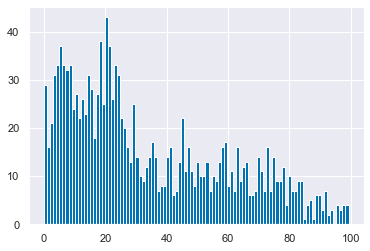

In [302]:
dummy_vars[dummy_vars<100].hist(bins=100)

In [304]:
dummies.drop(dummies.columns[dummies.var()<=40],axis=1,inplace=True)

In [350]:
demo_vars

['ukCitizenW1',
 'euCitizenW1',
 'commonwealthCitizenW1',
 'otherCitizenW1',
 'allSourceIncome_1W6',
 'allSourceIncome_2W6',
 'allSourceIncome_3W6',
 'allSourceIncome_4W6',
 'allSourceIncome_5W6',
 'allSourceIncome_6W6',
 'allSourceIncome_7W6',
 'allSourceIncome_8W6',
 'allSourceIncome_9W6',
 'allSourceIncome_10W6',
 'allSourceIncome_11W6',
 'allSourceIncome_99W6',
 'mainSourceIncomeW6',
 'anyUniW7',
 'ukCitizenW8',
 'euCitizenW8',
 'commonwealthCitizenW8',
 'otherCitizenW8',
 'livedAbroadW8',
 'friendsEUW8',
 'parentsForeignW8',
 'motherCountryBornW8',
 'fatherCountryBornW8',
 'travelEUW9',
 'passportUKW9',
 'passportOtherW9',
 'passportExpiredW9',
 'passportNeverW9',
 'anyUniW9',
 'anyUniW10',
 'allSourceIncome_1W11',
 'allSourceIncome_2W11',
 'allSourceIncome_3W11',
 'allSourceIncome_4W11',
 'allSourceIncome_5W11',
 'allSourceIncome_6W11',
 'allSourceIncome_7W11',
 'allSourceIncome_8W11',
 'allSourceIncome_9W11',
 'allSourceIncome_10W11',
 'allSourceIncome_11W11',
 'allSourceIncome_

In [311]:
%%time
col_dict = {}
for col in pd.Series([x for x in BES_reduced_with_na.columns if ("__" in x)]):
#col = "blackEqualityW16__Gone much too far"
    mask = BES_reduced_with_na[col].notnull()
    corrs = dummies[mask].corrwith(BES_reduced_with_na[col][mask]).dropna()
    col_dict[col] = corrs.loc[corrs.abs().sort_values(ascending=False).head(20).index]


Wall time: 3h 48min 14s


In [312]:
col_dict_backup = col_dict.copy()

In [354]:
non_demo_vars = [x for x in col_dict.keys() if not re.match("|".join(demo_vars)+"|al\d+|al_scale",x)]

In [370]:
pd.DataFrame(col_dict)[non_demo_vars].max().sort_values()[-100:].head(50)

leftRightW16__Right                                    0.427726
likeFarageW15__Strongly like                           0.428400
euLeaveVoiceW11__Much higher                           0.428434
changeImmigW3__Getting a lot higher                    0.428847
antiIntellectualW16__Strongly agree                    0.428927
likeUKIPW13__Strongly like                             0.429168
leftRightW13__Right                                    0.430005
euRedTapeW8__Strongly agree                            0.430743
handleMIIUKIPW7__Very well                             0.432383
socialIdentityGlobalLeaveW9__A great deal in common    0.433089
likeBrexitPartyW16__Strongly like                      0.434118
changeImmigW1__Getting a lot higher                    0.435332
socialDistUKIPW15__Very happy                          0.435739
likeFarageW9__Strongly like                            0.435948
govtHandoutsW7__Strongly agree                         0.436034
ptvUKIPW9__Very likely                  

In [369]:
col_dict["handleMIIUKIPW9__Very well"]

passportOtherW9_No                                     0.471096
p_ethnicityW9_White British                            0.441220
passportNeverW9_No                                     0.430094
preschoolKidsInHouseW6_W14_No                          0.419422
p_sexualityW9_Heterosexual                             0.412177
privPrimSchlW1_W4W7W9_W12W14W15_No                     0.403319
p_ethnicityW8_White British                            0.380200
p_sexualityW8_Heterosexual                             0.357099
privScndSchlW1_W4W7W9_W12W14W15_No                     0.355235
sickElderlyInHouseW6_W14_No                            0.353028
neverPrivSchlW1_W4W7W9_W12W14W15_Yes                   0.335350
anyUniW9_No, I have never attended higher education    0.302846
passportExpiredW9_No                                   0.301643
p_ethnicityW7_White British                            0.298519
p_parentW9_Yes                                         0.297854
p_sexualityW7_Heterosexual              

In [ ]:
# likeUKIPW9__Strongly like
# handleMIIUKIPW9__Very well
#     passportOtherW9_No                                     0.463865
#     p_ethnicityW9_White British                            0.447078
#     preschoolKidsInHouseW6_W14_No                          0.416100
#     passportNeverW9_No                                     0.414351

# leftRightW14__Right
#     otherCitizenW14_No                                    0.469911
#     ukCitizenW14_Yes                                      0.453878
#     commonwealthCitizenW14_No                             0.446040
#     euCitizenW14_No                                       0.439211
#     smallEmergency_99W14_Yes                              0.431017 **
#     p_ethnicityW14_White British                          0.411978
#     borrowEssentialsW14_No                                0.410326 **

# "taxSpendUKIPW14__Government should increase taxes a lot and spend much more on health and social services"
#     otherCitizenW14_No                                      0.469769
#     ukCitizenW14_Yes                                        0.453979
#     commonwealthCitizenW14_No                               0.453977
#     euCitizenW14_No                                         0.444598
#     smallEmergency_99W14_Yes                                0.416969
#     p_ethnicityW14_White British                            0.393456
#     preschoolKidsInHouseW6_W14_No                           0.392745
#     p_sexualityW14_Heterosexual                             0.390432
#     smallEmergency_2W14_No                                  0.374132
#     smallEmergency_3W14_No                                  0.363566


# overseasAidW14__Strongly agree, 
# dealPriorityImmigW15__Extremely important
# immigrantsWelfareStateW1__Strongly agree
# euPriorityBalanceW14__Control immigration
# dealPriorityImmigW16__Extremely important
# dealPriorityRedTapeW15__Extremely important

#### similar
#     otherCitizenW14_No                                      0.594107
#     commonwealthCitizenW14_No                               0.575370
#     ukCitizenW14_Yes                                        0.575356
#     euCitizenW14_No                                         0.560288
#     p_ethnicityW14_White British                            0.516089

# immigrantsWelfareStateW7__Strongly agree
# immigrantsWelfareStateW8__Strongly agree
#     p_ethnicityW7_White British                            0.568184

# immigrantsWelfareStateW3__Strongly agree
# immigrantsWelfareStateW4__Strongly agree
#     p_ethnicityW3_White British             0.542053
#     p_sexualityW3_Heterosexual              0.503992
#     privPrimSchlW1_W4W7W9_W12W14W15_No      0.491119
#     p_ethnicityW4_White British             0.440917
#     p_ethnicityW2_White British             0.434655
#     preschoolKidsInHouseW6_W14_No           0.427326
#     privScndSchlW1_W4W7W9_W12W14W15_No      0.426127

# overseasAidW11__Strongly agree
# immigrantsWelfareStateW11__Strongly agree

#     allSourceIncome_99W11_No                                0.545430
#     allSourceIncome_9W11_No                                 0.541363
#     p_ethnicityW11_White British                            0.539179
#     allSourceIncome_10W11_No                                0.539022
#     preschoolKidsInHouseW6_W14_No                           0.515225
#     allSourceIncome_4W11_No                                 0.508914
#     privPrimSchlW1_W4W7W9_W12W14W15_No                      0.497823
#     p_sexualityW11_Heterosexual                             0.493130
#     allSourceIncome_5W11_No                                 0.490256
#     allSourceIncome_11W11_No                                0.487010
#     allSourceIncome_7W11_No                                 0.464008

# euPriorityBalanceW13__Control immigration
#     p_ethnicityW13_White British                            0.527031
#     p_sexualityW13_Heterosexual                             0.488488
#     preschoolKidsInHouseW6_W14_No                           0.487957
#     privPrimSchlW1_W4W7W9_W12W14W15_No                      0.439738
#     sickElderlyInHouseW6_W14_No                             0.428215




In [308]:
pd.Series([x for x in BES_reduced_with_na.columns if ("__" in x)])

0       turnoutUKGeneralW1__Very likely that I will vote
1       turnoutUKGeneralW2__Very likely that I will vote
2       turnoutUKGeneralW3__Very likely that I will vote
3       turnoutUKGeneralW4__Very likely that I will vote
4       turnoutUKGeneralW5__Very likely that I will vote
                              ...                       
3196           parentNumEmployees__500 or more employees
3197                              jobzoneW1W2W3W4W5__5.0
3198                                jobzoneW6W7W8W9__5.0
3199                               jobzoneW16W17W18__5.0
3200                                     jobzoneW19__5.0
Length: 3201, dtype: object

In [271]:
corrs_blackEquality.dropna().abs().sort_values(ascending=False).head(10)

otherCitizenW16_No               0.439039
p_eurefvote_Leave the EU         0.437242
ukCitizenW16_Yes                 0.429573
commonwealthCitizenW16_No        0.418634
p_ethnicityW16_White British     0.417891
euCitizenW16_No                  0.409083
p_sexualityW16_Heterosexual      0.364493
p_eurefturnout_Yes               0.349331
p_past_vote_2017_Conservative    0.336030
p_turnout_2015_Voted             0.308857
dtype: float64

In [265]:
BES_vars = BES_reduced_with_na.var()

In [256]:
9520*8/(60*60)

21.155555555555555

In [257]:
dummies.columns

Index(['ukCitizenW1_No', 'ukCitizenW1_Yes', 'euCitizenW1_No',
       'euCitizenW1_Yes', 'commonwealthCitizenW1_No',
       'commonwealthCitizenW1_Yes', 'otherCitizenW1_No', 'otherCitizenW1_Yes',
       'allSourceIncome_1W6_No', 'allSourceIncome_1W6_Yes',
       ...
       'gorW20_North West', 'gorW20_Yorkshire and The Humber',
       'gorW20_East Midlands', 'gorW20_West Midlands',
       'gorW20_East of England', 'gorW20_London', 'gorW20_South East',
       'gorW20_South West', 'gorW20_Wales', 'gorW20_Scotland'],
      dtype='object', length=4512)

In [266]:
search(BES_Panel, demog_var+"|^p_")[200:].head(50)

p_gross_householdW8     33423
p_gross_personalW8      33413
p_hh_sizeW8             33432
p_housingW8             33355
p_maritalW8             33466
p_paper_readW8          33500
p_parentW8              28753
p_religionW8            33261
p_sexualityW8           33002
p_socgradeW8            33500
p_work_statW8           33500
p_disabilityW9          29739
p_education_ageW9       29784
p_educationW9           30034
p_ethnicityW9           30000
p_gross_householdW9     30004
p_gross_personalW9      30000
p_hh_sizeW9             30001
p_housingW9             29953
p_maritalW9             30028
p_paper_readW9          30034
p_parentW9              28764
p_religionW9            29888
p_sexualityW9           29802
p_socgradeW9            30034
p_work_statW9           30034
p_disabilityW10         28226
p_education_ageW10      28750
p_educationW10          30236
p_ethnicityW10          30227
p_gross_householdW10    30236
p_gross_personalW10     29216
p_hh_sizeW10            30236
p_housingW